In [ ]:
!pip install mysql.connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 37.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247953 sha256=f426834d8c6cb300245b321bd0b8e3126bf3510c98ae5cbe6a1e604e6f677f7e
  Stored in directory: /root/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql.connector


In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
import mysql.connector as sql

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from feature_engine.outliers import Winsorizer


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import joblib
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data =pd.read_excel("/content/GPVS-Faultss.xlsx")

In [ ]:
print(data)

           Time       Ipv         Vpv         Vdc        ia        ib  \
0      8.491664  1.544891  101.300049  142.968750  0.381835 -0.490112   
1      2.946039  2.320648   90.728760  146.777344  0.039428  0.584106   
2      6.059431  1.536377  101.623535  142.968750  0.301269  0.134277   
3      0.762262  2.373627   88.256836  147.363281  0.240844  0.429688   
4      0.601378  2.286591   88.409424  147.656250  0.475829  0.187988   
...         ...       ...         ...         ...       ...       ...   
29995  3.035314  2.273346   87.188721  147.070312  0.348266 -0.671387   
29996  0.394598  1.448395  101.373291  144.140625  0.435546 -0.476685   
29997  2.888644  2.317810   90.399170  147.070312 -0.464112  0.691528   
29998  0.945134  1.495697  100.988770  144.140625 -0.517823  0.127563   
29999  3.122505  2.557159   87.957764  147.656250  0.247558  0.422974   

             ic          va          vb          vc      Iabc         If  \
0      0.094844 -110.466919  150.391235  -39.67

In [ ]:
data.columns

Index(['Time', 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc',
       'If', 'Vabc', 'Vf', 'DND'],
      dtype='object')

In [ ]:
print(data)

           Time       Ipv         Vpv         Vdc        ia        ib  \
0      8.491664  1.544891  101.300049  142.968750  0.381835 -0.490112   
1      2.946039  2.320648   90.728760  146.777344  0.039428  0.584106   
2      6.059431  1.536377  101.623535  142.968750  0.301269  0.134277   
3      0.762262  2.373627   88.256836  147.363281  0.240844  0.429688   
4      0.601378  2.286591   88.409424  147.656250  0.475829  0.187988   
...         ...       ...         ...         ...       ...       ...   
29995  3.035314  2.273346   87.188721  147.070312  0.348266 -0.671387   
29996  0.394598  1.448395  101.373291  144.140625  0.435546 -0.476685   
29997  2.888644  2.317810   90.399170  147.070312 -0.464112  0.691528   
29998  0.945134  1.495697  100.988770  144.140625 -0.517823  0.127563   
29999  3.122505  2.557159   87.957764  147.656250  0.247558  0.422974   

             ic          va          vb          vc      Iabc         If  \
0      0.094844 -110.466919  150.391235  -39.67

In [ ]:
data['DND'].value_counts()

DND
1    20000
0    10000
Name: count, dtype: int64

In [ ]:
data.head(5)

Time       Ipv         Vpv         Vdc        ia        ib        ic  \
0  8.491664  1.544891  101.300049  142.968750  0.381835 -0.490112  0.094844   
1  2.946039  2.320648   90.728760  146.777344  0.039428  0.584106 -0.670537   
2  6.059431  1.536377  101.623535  142.968750  0.301269  0.134277 -0.381841   
3  0.762262  2.373627   88.256836  147.363281  0.240844  0.429688 -0.636968   
4  0.601378  2.286591   88.409424  147.656250  0.475829  0.187988 -0.663823   

           va          vb          vc      Iabc         If        Vabc  \
0 -110.466919  150.391235  -39.679209  0.465142  50.185838  154.751450   
1   -5.605316 -130.718384  136.930440  0.669008  49.907602  154.872942   
2 -113.673401  -30.859375  147.361552  0.447712  49.934645  154.892021   
3  -69.505920  -84.935608  154.325002  0.690778  50.330598  154.803659   
4 -106.067047  -46.361389  150.969849  0.699244  49.948302  155.071592   

          Vf  DND  
0  49.995163    0  
1  50.001987    0  
2  50.008262    1  
3  49.993744    1  
4  50.004186    1

In [ ]:
data.tail(5)

Time       Ipv         Vpv         Vdc        ia        ib  \
29995  3.035314  2.273346   87.188721  147.070312  0.348266 -0.671387   
29996  0.394598  1.448395  101.373291  144.140625  0.435546 -0.476685   
29997  2.888644  2.317810   90.399170  147.070312 -0.464112  0.691528   
29998  0.945134  1.495697  100.988770  144.140625 -0.517823  0.127563   
29999  3.122505  2.557159   87.957764  147.656250  0.247558  0.422974   

             ic          va          vb          vc      Iabc         If  \
29995  0.316401  -74.110718  153.971405  -81.544291  0.663070  50.216318   
29996  0.047847 -110.768280  149.909058  -40.374349  0.509297  50.163328   
29997 -0.247563  109.466400 -150.535889   41.877136  0.691658  49.856226   
29998  0.363398  148.088837  -34.873505 -113.597056  0.501731  50.058510   
29999 -0.636968  -57.318878  -93.783569  154.120076  0.671411  49.954470   

             Vabc         Vf  DND  
29995  154.996440  50.011969    1  
29996  155.168063  50.008520    1  
29997  154.988095  50.008975    0  
29998  154.936311  49.999278    0  
29999  155.226651  49.977158    1

In [ ]:
data.describe()

Time           Ipv           Vpv           Vdc            ia  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       6.625781      1.757652     91.976542    137.076787     -0.022879   
std        3.932605      0.434881     23.871453     37.592898      0.747015   
min        0.000025      0.718048      1.116943      0.585938     -6.358888   
25%        3.253257      1.431366     90.490723    142.968750     -0.383546   
50%        6.501575      1.517456    101.202393    143.847656     -0.000855   
75%        9.821328      2.231720    101.635742    146.777344      0.334838   
max       14.369075      3.061401    106.304932    237.890625     11.271728   

                 ib            ic            va            vb            vc  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.025592     -0.048809      0.663288      1.025666      0.747015   
std        0.770528      0.741239    109.922547    109.956147    109.495462   
min       -7.264404    -12.688359   -159.034271   -159.215088   -157.752482   
25%       -0.328979     -0.348271   -109.267502   -108.936005   -108.164520   
50%        0.020142     -0.059575      1.090927      1.458588      0.642904   
75%        0.369263      0.289546    110.454865    111.268539    109.849129   
max        6.438599      6.352168    160.324097    159.649048    159.207052   

               Iabc            If          Vabc            Vf           DND  
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  
mean       0.618741     49.341476    154.887091     49.999756      0.666667  
std        0.847313      4.971143      6.953803      0.023232      0.471412  
min        0.000001     -0.022219      1.000000     49.492334      0.000000  
25%        0.451276     49.905288    154.979409     49.995819      0.000000  
50%        0.484648     50.005100    155.246966     50.000088      1.000000  
75%        0.669136     50.113791    155.446422     50.004349      1.000000  
max        6.460823     51.337426    156.268283     50.461928      1.000000

In [ ]:
data

Time       Ipv         Vpv         Vdc        ia        ib  \
0      8.491664  1.544891  101.300049  142.968750  0.381835 -0.490112   
1      2.946039  2.320648   90.728760  146.777344  0.039428  0.584106   
2      6.059431  1.536377  101.623535  142.968750  0.301269  0.134277   
3      0.762262  2.373627   88.256836  147.363281  0.240844  0.429688   
4      0.601378  2.286591   88.409424  147.656250  0.475829  0.187988   
...         ...       ...         ...         ...       ...       ...   
29995  3.035314  2.273346   87.188721  147.070312  0.348266 -0.671387   
29996  0.394598  1.448395  101.373291  144.140625  0.435546 -0.476685   
29997  2.888644  2.317810   90.399170  147.070312 -0.464112  0.691528   
29998  0.945134  1.495697  100.988770  144.140625 -0.517823  0.127563   
29999  3.122505  2.557159   87.957764  147.656250  0.247558  0.422974   

             ic          va          vb          vc      Iabc         If  \
0      0.094844 -110.466919  150.391235  -39.679209  0.465142  50.185838   
1     -0.670537   -5.605316 -130.718384  136.930440  0.669008  49.907602   
2     -0.381841 -113.673401  -30.859375  147.361552  0.447712  49.934645   
3     -0.636968  -69.505920  -84.935608  154.325002  0.690778  50.330598   
4     -0.663823 -106.067047  -46.361389  150.969849  0.699244  49.948302   
...         ...         ...         ...         ...       ...        ...   
29995  0.316401  -74.110718  153.971405  -81.544291  0.663070  50.216318   
29996  0.047847 -110.768280  149.909058  -40.374349  0.509297  50.163328   
29997 -0.247563  109.466400 -150.535889   41.877136  0.691658  49.856226   
29998  0.363398  148.088837  -34.873505 -113.597056  0.501731  50.058510   
29999 -0.636968  -57.318878  -93.783569  154.120076  0.671411  49.954470   

             Vabc         Vf  DND  
0      154.751450  49.995163    0  
1      154.872942  50.001987    0  
2      154.892021  50.008262    1  
3      154.803659  49.993744    1  
4      155.071592  50.004186    1  
...           ...        ...  ...  
29995  154.996440  50.011969    1  
29996  155.168063  50.008520    1  
29997  154.988095  50.008975    0  
29998  154.936311  49.999278    0  
29999  155.226651  49.977158    1  

[30000 rows x 15 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    30000 non-null  float64
 1   Ipv     30000 non-null  float64
 2   Vpv     30000 non-null  float64
 3   Vdc     30000 non-null  float64
 4   ia      30000 non-null  float64
 5   ib      30000 non-null  float64
 6   ic      30000 non-null  float64
 7   va      30000 non-null  float64
 8   vb      30000 non-null  float64
 9   vc      30000 non-null  float64
 10  Iabc    30000 non-null  float64
 11  If      30000 non-null  float64
 12  Vabc    30000 non-null  float64
 13  Vf      30000 non-null  float64
 14  DND     30000 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 3.4 MB


In [ ]:
# Drop the first column - Time
data = data.drop(columns = 'Time', axis = 1)
data

Ipv         Vpv         Vdc        ia        ib        ic  \
0      1.544891  101.300049  142.968750  0.381835 -0.490112  0.094844   
1      2.320648   90.728760  146.777344  0.039428  0.584106 -0.670537   
2      1.536377  101.623535  142.968750  0.301269  0.134277 -0.381841   
3      2.373627   88.256836  147.363281  0.240844  0.429688 -0.636968   
4      2.286591   88.409424  147.656250  0.475829  0.187988 -0.663823   
...         ...         ...         ...       ...       ...       ...   
29995  2.273346   87.188721  147.070312  0.348266 -0.671387  0.316401   
29996  1.448395  101.373291  144.140625  0.435546 -0.476685  0.047847   
29997  2.317810   90.399170  147.070312 -0.464112  0.691528 -0.247563   
29998  1.495697  100.988770  144.140625 -0.517823  0.127563  0.363398   
29999  2.557159   87.957764  147.656250  0.247558  0.422974 -0.636968   

               va          vb          vc      Iabc         If        Vabc  \
0     -110.466919  150.391235  -39.679209  0.465142  50.185838  154.751450   
1       -5.605316 -130.718384  136.930440  0.669008  49.907602  154.872942   
2     -113.673401  -30.859375  147.361552  0.447712  49.934645  154.892021   
3      -69.505920  -84.935608  154.325002  0.690778  50.330598  154.803659   
4     -106.067047  -46.361389  150.969849  0.699244  49.948302  155.071592   
...           ...         ...         ...       ...        ...         ...   
29995  -74.110718  153.971405  -81.544291  0.663070  50.216318  154.996440   
29996 -110.768280  149.909058  -40.374349  0.509297  50.163328  155.168063   
29997  109.466400 -150.535889   41.877136  0.691658  49.856226  154.988095   
29998  148.088837  -34.873505 -113.597056  0.501731  50.058510  154.936311   
29999  -57.318878  -93.783569  154.120076  0.671411  49.954470  155.226651   

              Vf  DND  
0      49.995163    0  
1      50.001987    0  
2      50.008262    1  
3      49.993744    1  
4      50.004186    1  
...          ...  ...  
29995  50.011969    1  
29996  50.008520    1  
29997  50.008975    0  
29998  49.999278    0  
29999  49.977158    1  

[30000 rows x 14 columns]

In [ ]:
data.duplicated().sum()


0

In [ ]:
data['DND'].value_counts()


DND
1    20000
0    10000
Name: count, dtype: int64

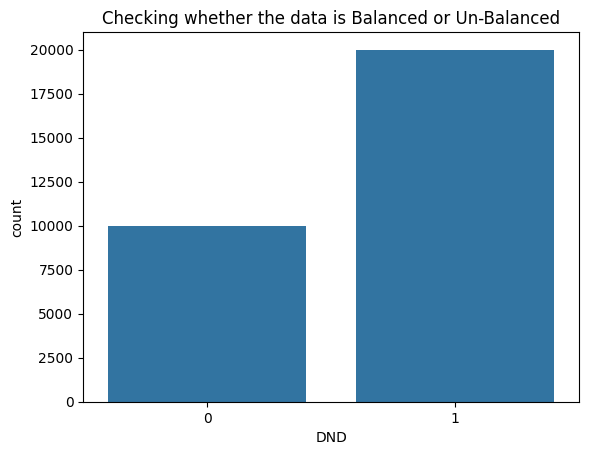

In [ ]:
x = 'DND'

# Create the count plot
sns.countplot(x = x, data = data)

# tile for the plot
plt.title('Checking whether the data is Balanced or Un-Balanced')

# Show the plot
plt.show()

EDA



In [ ]:
data.columns

Index(['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If',
       'Vabc', 'Vf', 'DND'],
      dtype='object')

In [ ]:
Mean = data.mean()
print(Mean)

Ipv       1.757652
Vpv      91.976542
Vdc     137.076787
ia       -0.022879
ib        0.025592
ic       -0.048809
va        0.663288
vb        1.025666
vc        0.747015
Iabc      0.618741
If       49.341476
Vabc    154.887091
Vf       49.999756
DND       0.666667
dtype: float64


In [ ]:
Median = data.median()
print(Median)


Ipv       1.517456
Vpv     101.202393
Vdc     143.847656
ia       -0.000855
ib        0.020142
ic       -0.059575
va        1.090927
vb        1.458588
vc        0.642904
Iabc      0.484648
If       50.005100
Vabc    155.246966
Vf       50.000088
DND       1.000000
dtype: float64


In [ ]:
Mode = data.mode()
print(Mode)

        Ipv         Vpv         Vdc        ia        ib        ic          va  \
0  1.478668  101.409912  143.554688  0.005858  0.006714 -0.341558 -154.766998   
1       NaN         NaN         NaN       NaN       NaN       NaN         NaN   

           vb          vc  Iabc    If  Vabc    Vf  DND  
0 -152.151184  154.184367   1.0  50.0   1.0  50.0  1.0  
1  154.562073  156.048787   NaN   NaN   NaN   NaN  NaN  


In [ ]:
Variance = data.var()
print(Variance)

Ipv         0.189122
Vpv       569.846252
Vdc      1413.225967
ia          0.558032
ib          0.593714
ic          0.549435
va      12082.966361
vb      12090.354316
vc      11989.256250
Iabc        0.717939
If         24.712262
Vabc       48.355370
Vf          0.000540
DND         0.222230
dtype: float64


In [ ]:
Standard_deviation = data.std()
print(Standard_deviation)

Ipv       0.434881
Vpv      23.871453
Vdc      37.592898
ia        0.747015
ib        0.770528
ic        0.741239
va      109.922547
vb      109.956147
vc      109.495462
Iabc      0.847313
If        4.971143
Vabc      6.953803
Vf        0.023232
DND       0.471412
dtype: float64


In [ ]:
Kurtosis = data.kurt()
print(Kurtosis)

Ipv      -1.083067
Vpv       9.400712
Vdc       8.598202
ia       36.672088
ib       35.458429
ic       40.948955
va       -1.502844
vb       -1.502283
vc       -1.493552
Iabc     37.765892
If       71.371379
Vabc    471.349400
Vf      101.645061
DND      -1.500050
dtype: float64


In [ ]:
Skewness = data.skew()
print(Skewness)

Ipv      0.758712
Vpv     -3.279081
Vdc     -2.680479
ia      -0.109050
ib       0.088248
ic       0.056013
va       0.001067
vb      -0.004071
vc      -0.000272
Iabc     6.145156
If      -8.328405
Vabc   -21.580826
Vf      -2.603007
DND     -0.707142
dtype: float64


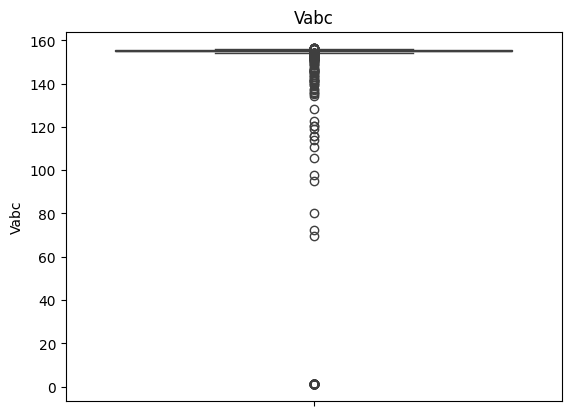

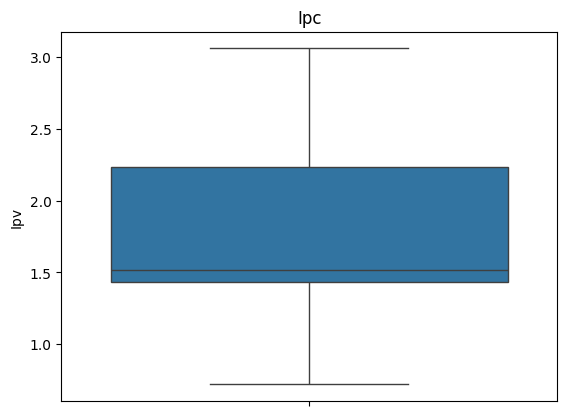

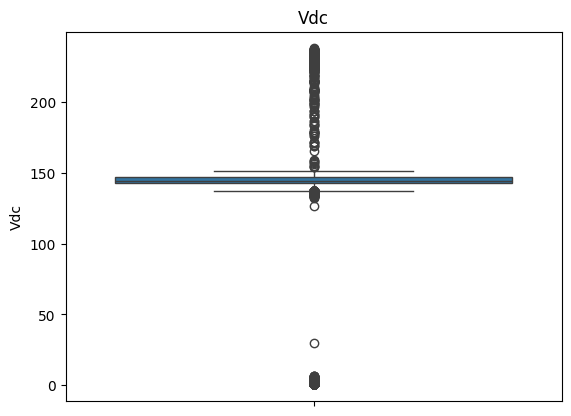

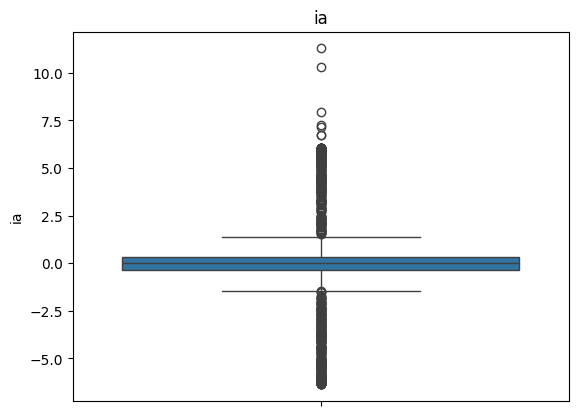

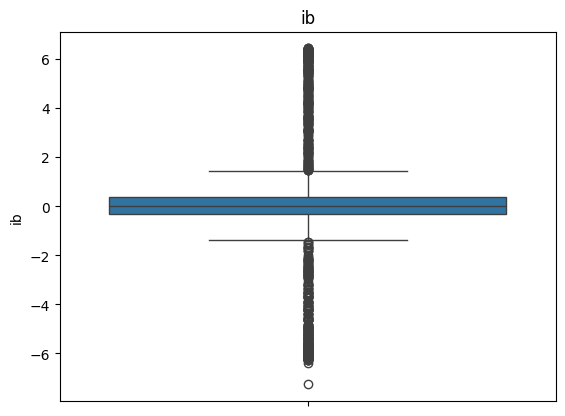

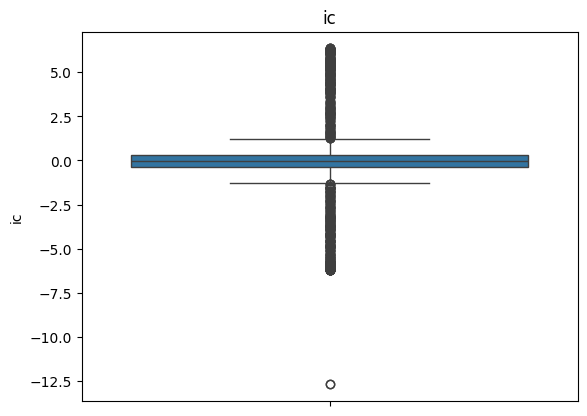

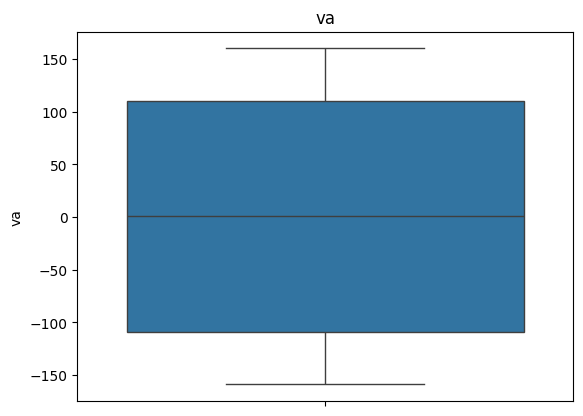

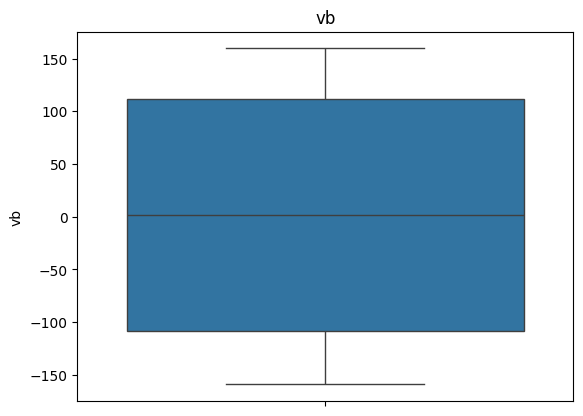

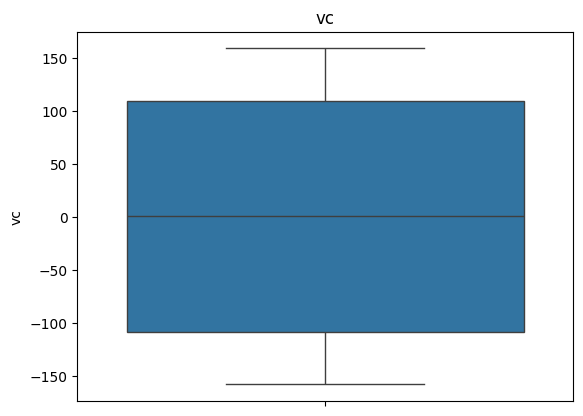

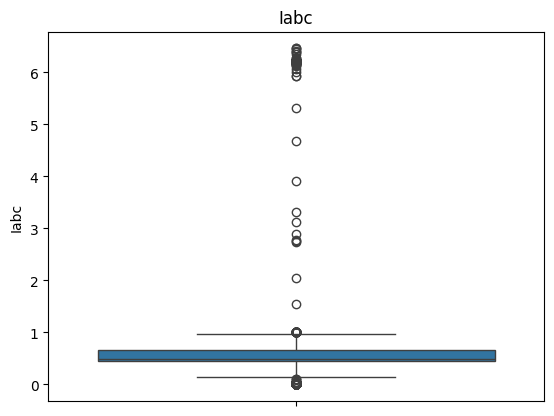

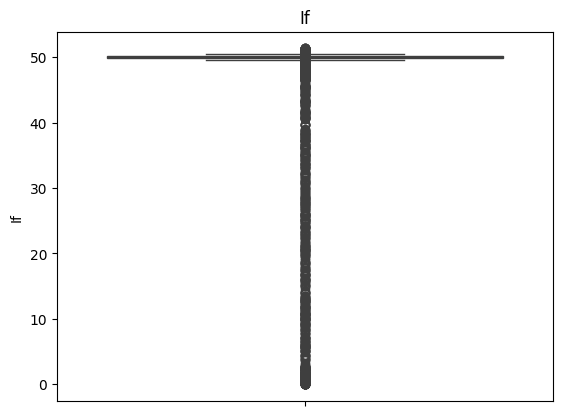

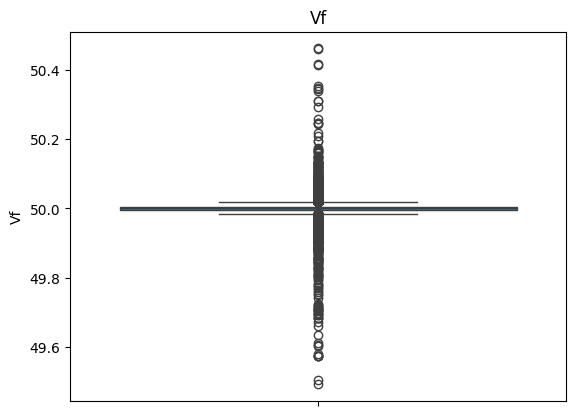

In [ ]:
## Box plot for all the variables in the dataset

sns.boxplot(data.Vabc); plt.title('Vabc'); plt.show()
sns.boxplot(data.Ipv); plt.title('Ipc'); plt.show()
sns.boxplot(data.Vdc); plt.title('Vdc'); plt.show()
sns.boxplot(data.ia); plt.title('ia'); plt.show()
sns.boxplot(data.ib); plt.title('ib'); plt.show()
sns.boxplot(data.ic); plt.title('ic'); plt.show()
sns.boxplot(data.va); plt.title('va'); plt.show()
sns.boxplot(data.vb); plt.title('vb'); plt.show()
sns.boxplot(data.vc); plt.title('vc'); plt.show()
sns.boxplot(data.Iabc); plt.title('Iabc'); plt.show()
sns.boxplot(data.If); plt.title('If'); plt.show()
sns.boxplot(data.Vf); plt.title('Vf'); plt.show()

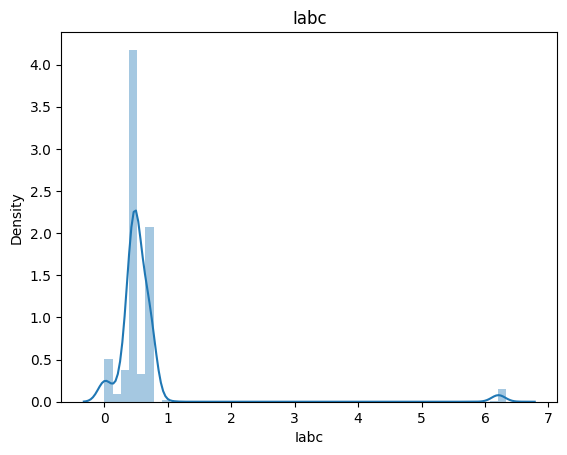

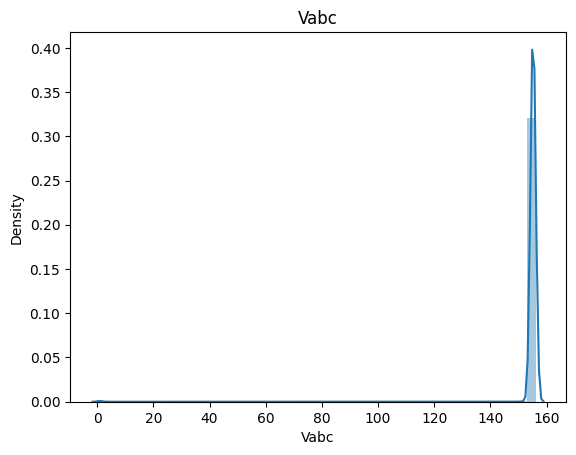

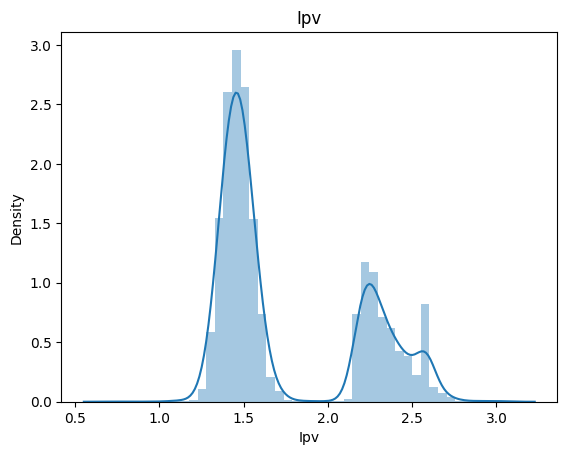

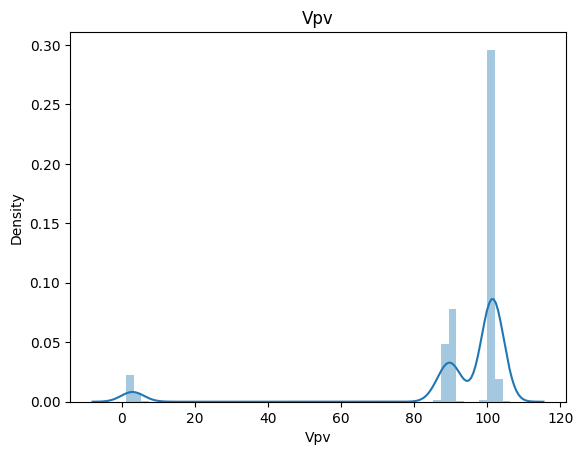

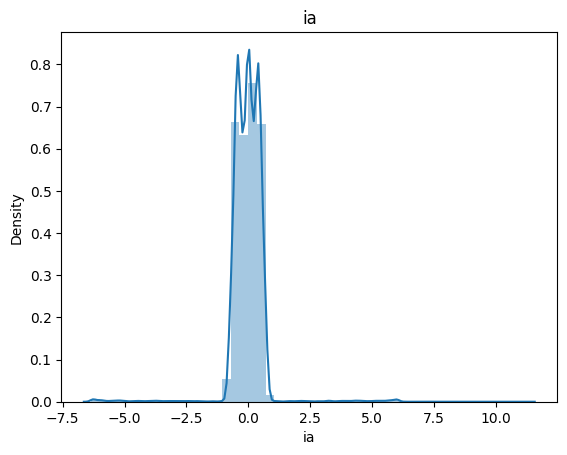

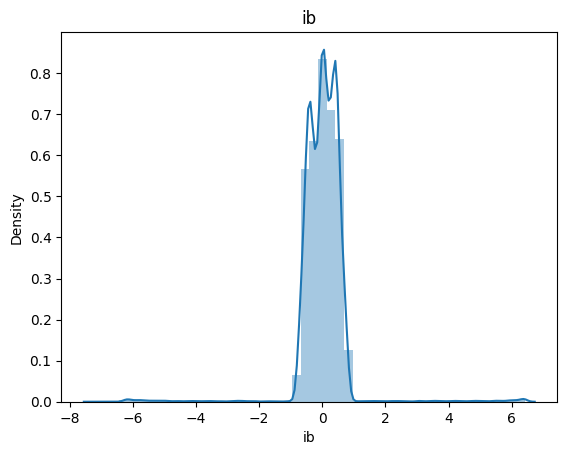

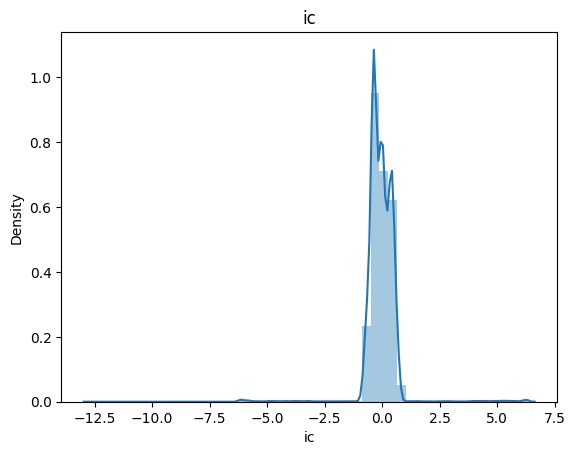

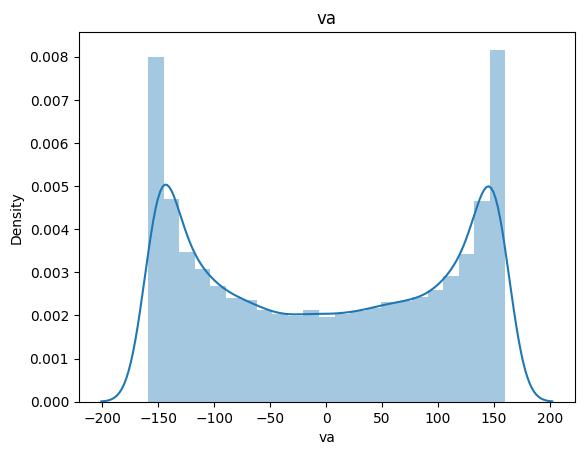

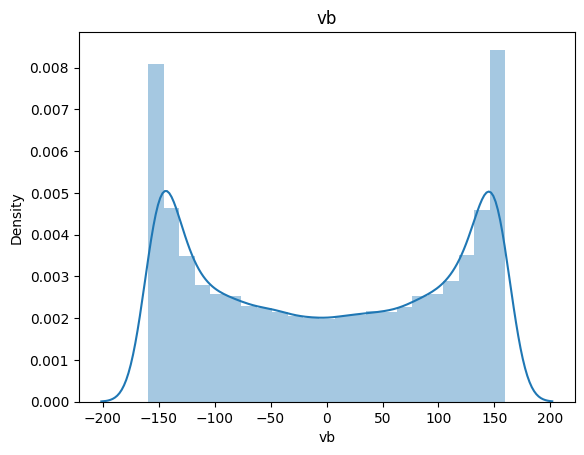

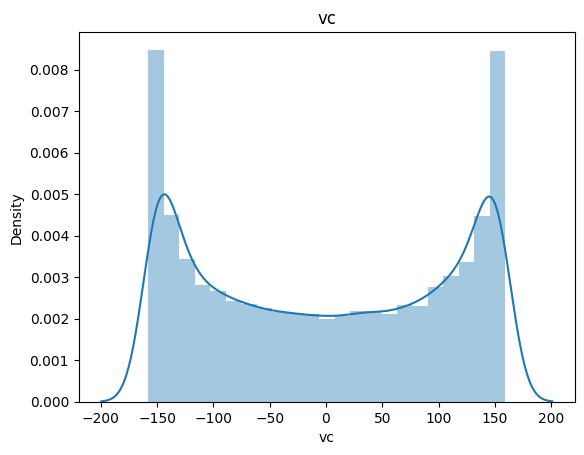

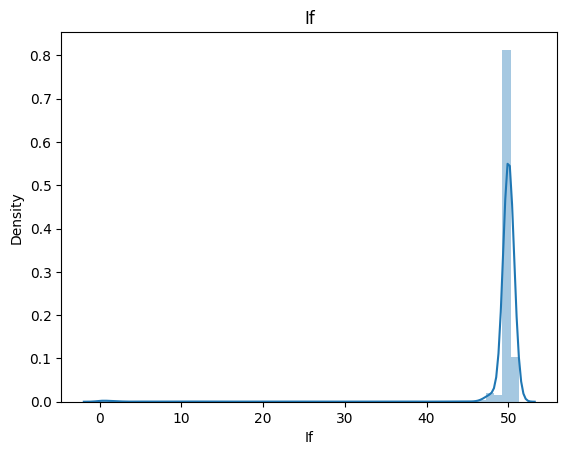

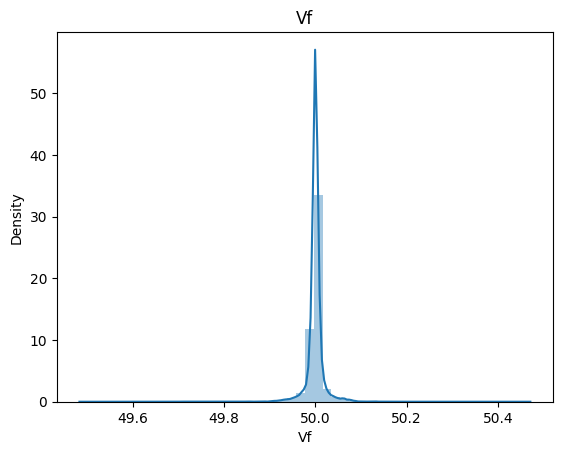

In [ ]:
## Density Plot for all the variables in the dataset

sns.distplot(data.Iabc); plt.title('Iabc'); plt.show()
sns.distplot(data.Vabc); plt.title('Vabc'); plt.show()
sns.distplot(data.Ipv); plt.title('Ipv'); plt.show()
sns.distplot(data.Vpv); plt.title('Vpv'); plt.show()
sns.distplot(data.ia); plt.title('ia'); plt.show()
sns.distplot(data.ib); plt.title('ib'); plt.show()
sns.distplot(data.ic); plt.title('ic'); plt.show()
sns.distplot(data.va); plt.title('va'); plt.show()
sns.distplot(data.vb); plt.title('vb'); plt.show()
sns.distplot(data.vc); plt.title('vc'); plt.show()
sns.distplot(data.If); plt.title('If'); plt.show()
sns.distplot(data.Vf); plt.title('Vf'); plt.show()

In [ ]:
data.dtypes

Ipv     float64
Vpv     float64
Vdc     float64
ia      float64
ib      float64
ic      float64
va      float64
vb      float64
vc      float64
Iabc    float64
If      float64
Vabc    float64
Vf      float64
DND       int64
dtype: object

<Axes: >

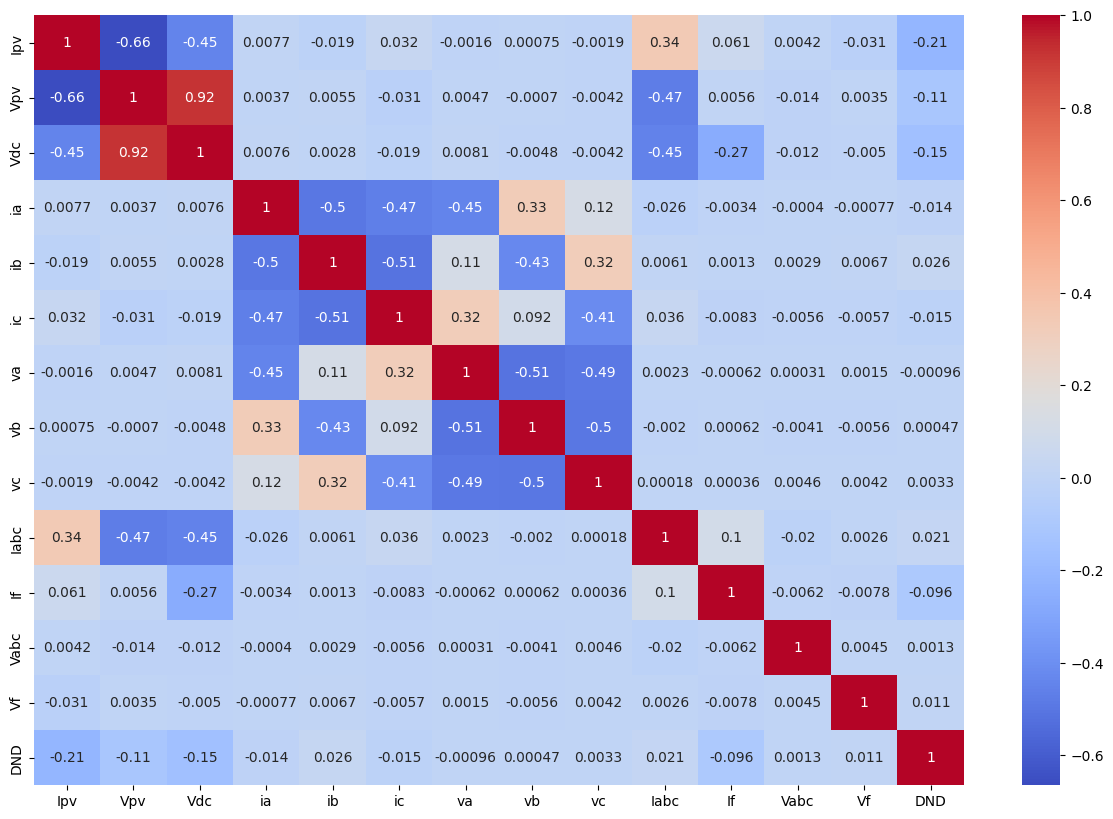

In [ ]:
# Correlation coefficient
data.corr()

# Create a heatmap
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

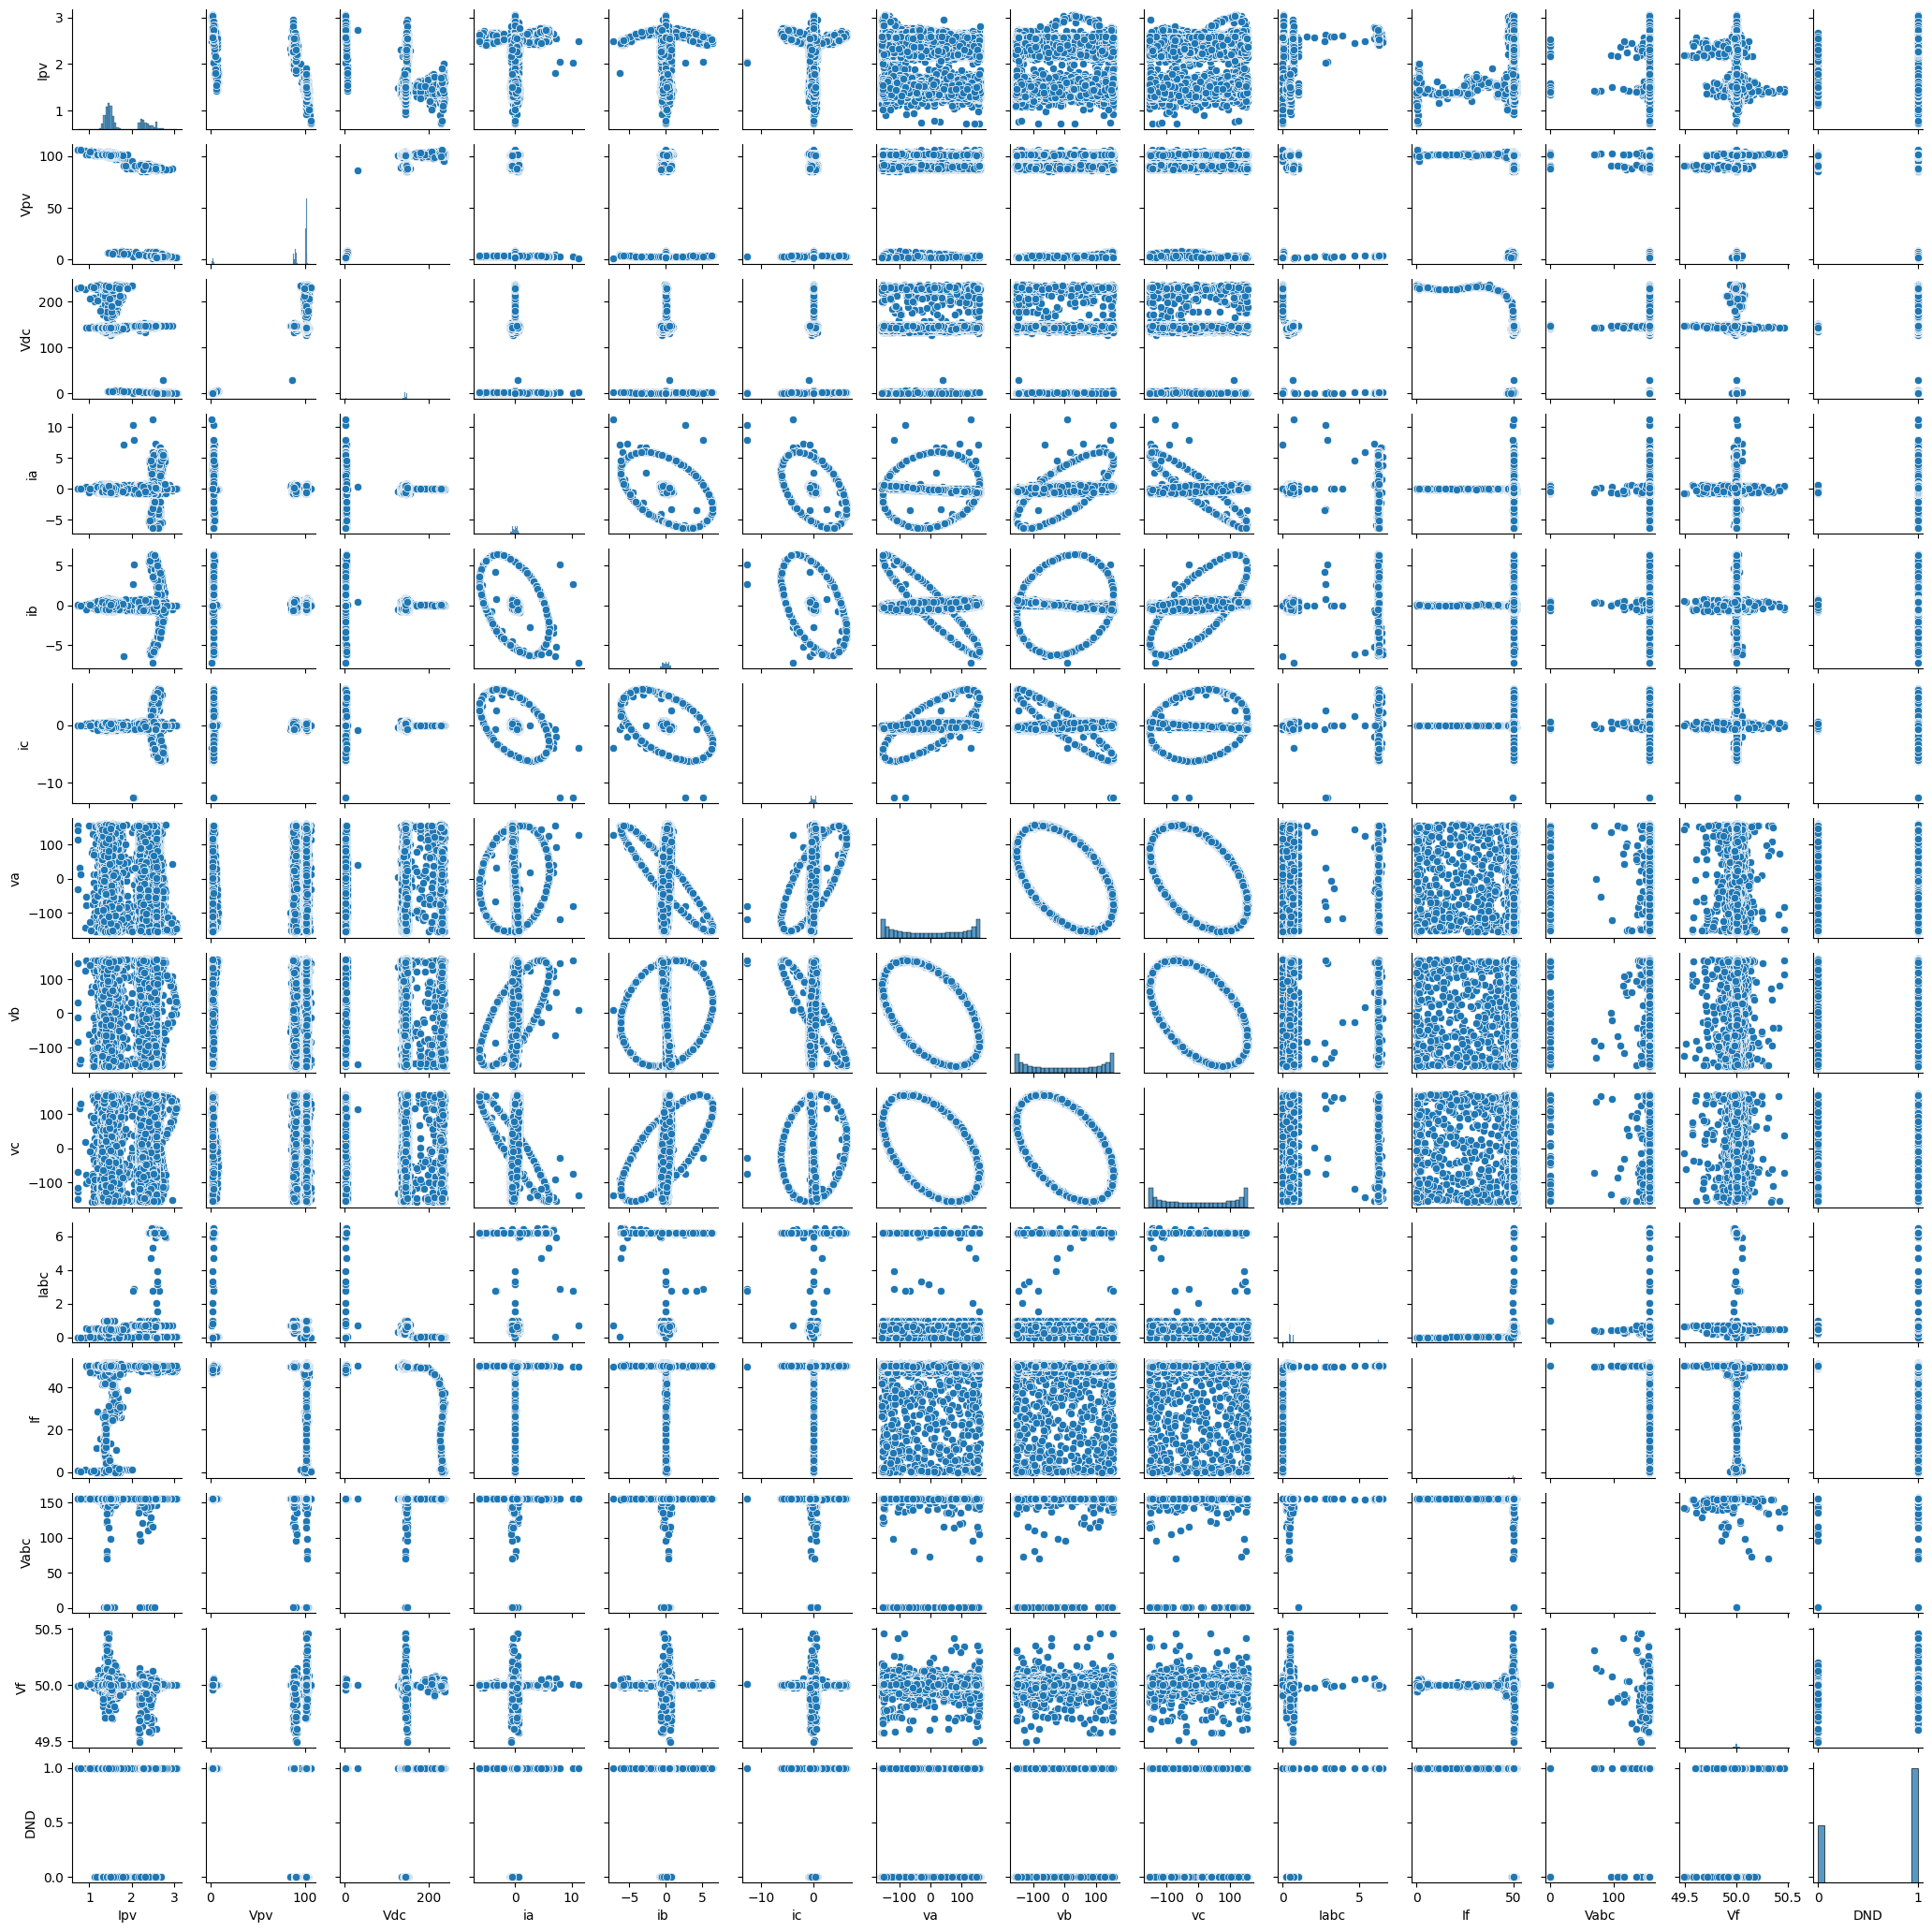

In [ ]:
# Creating scatter plot for all columns
sns.pairplot(data, height = 1.5)

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 52.3 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


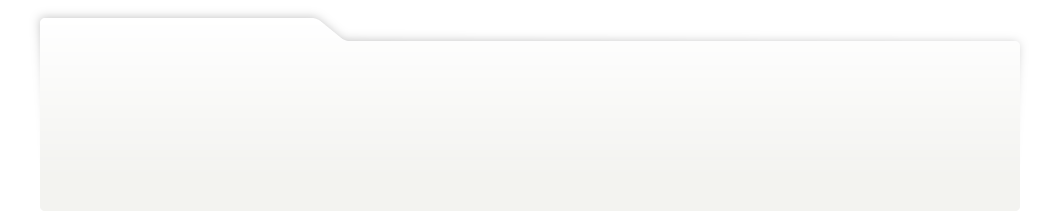
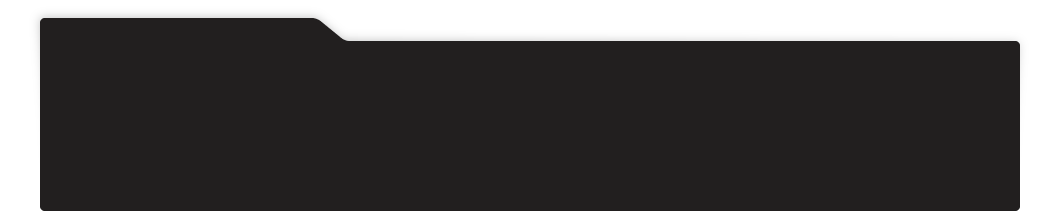
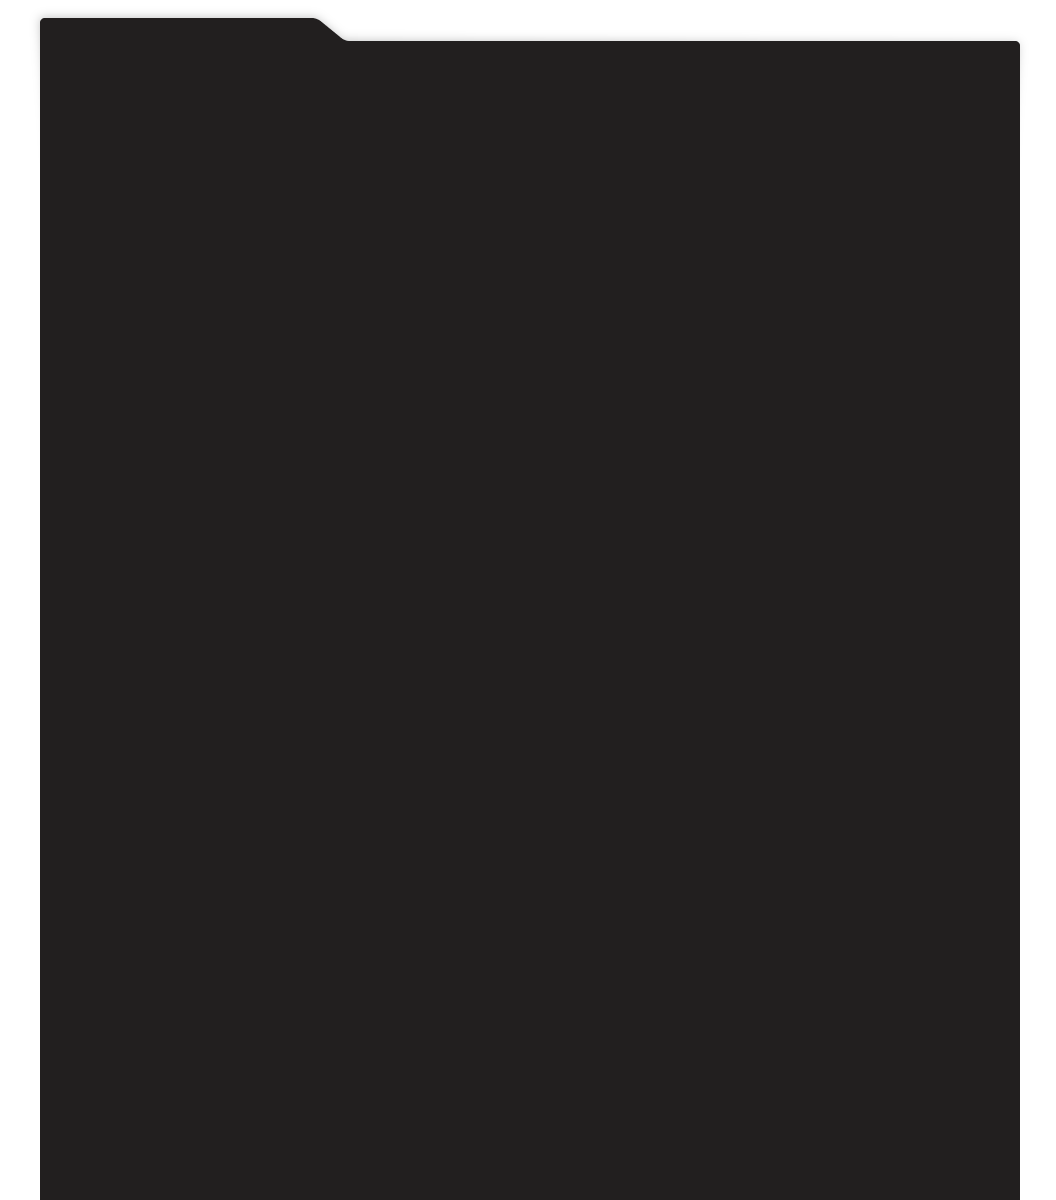
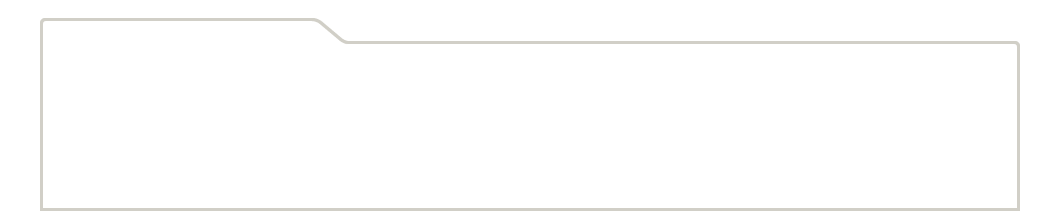
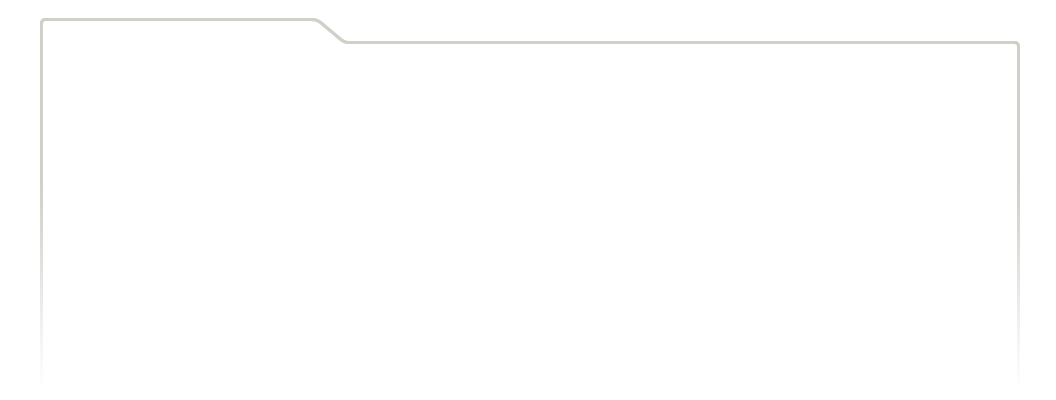
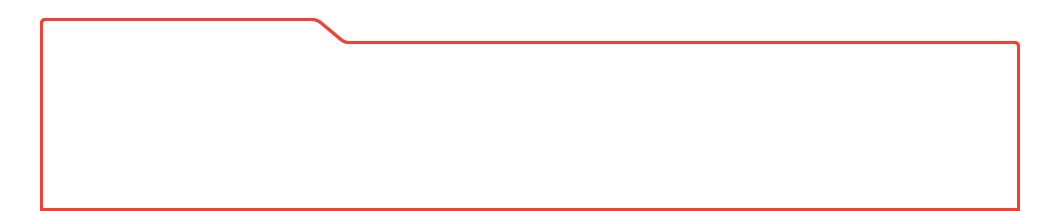
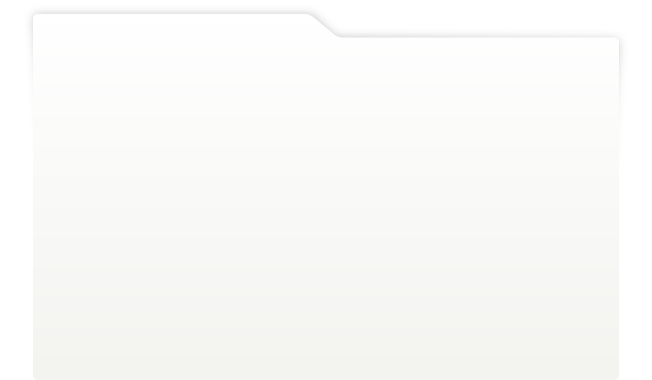
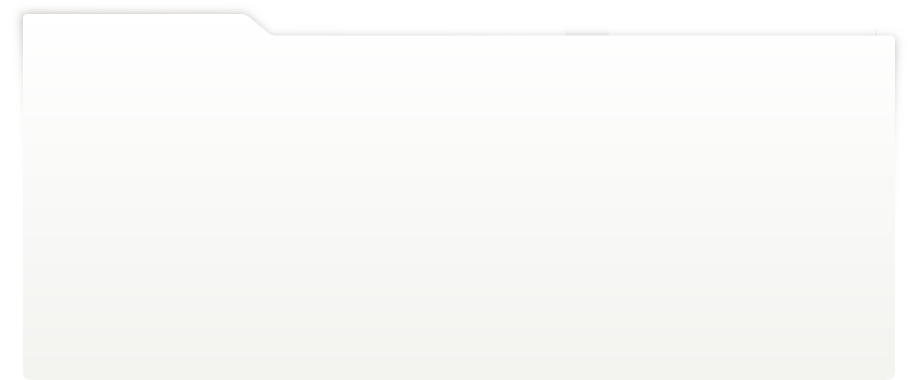
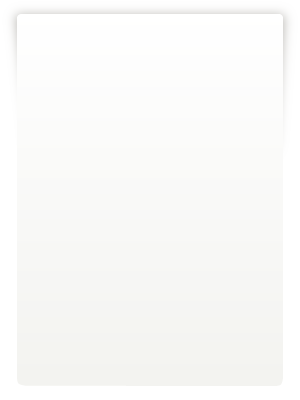
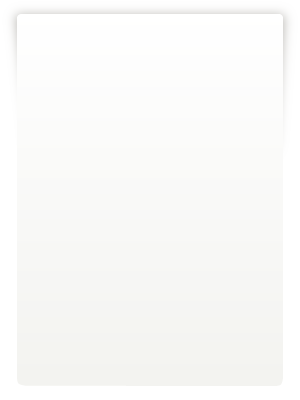
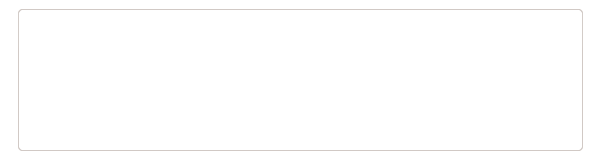
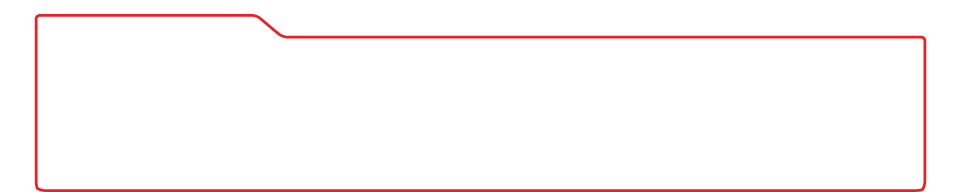
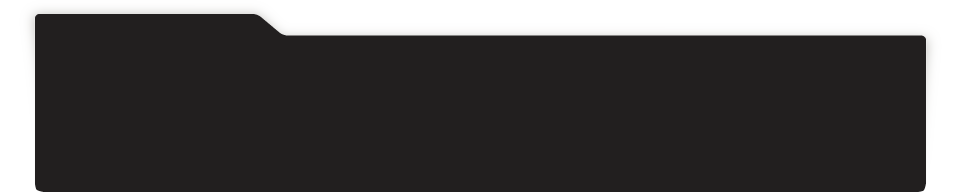
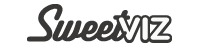
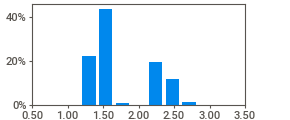
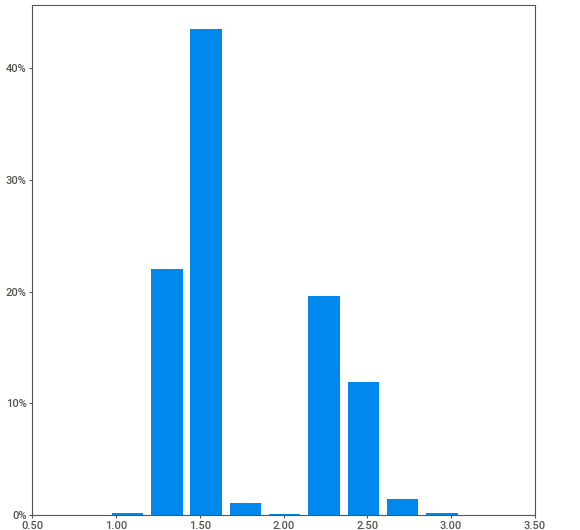
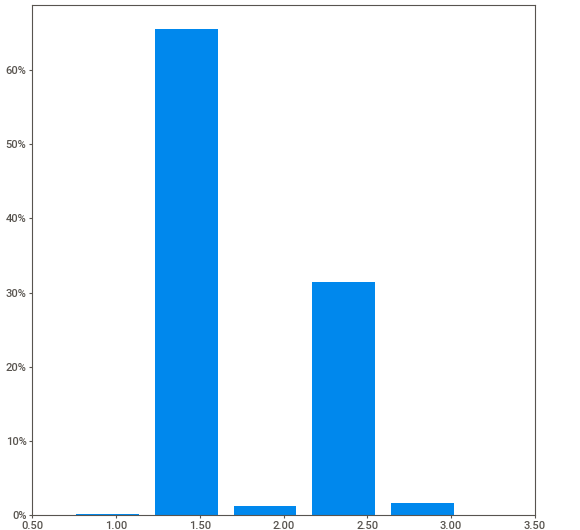
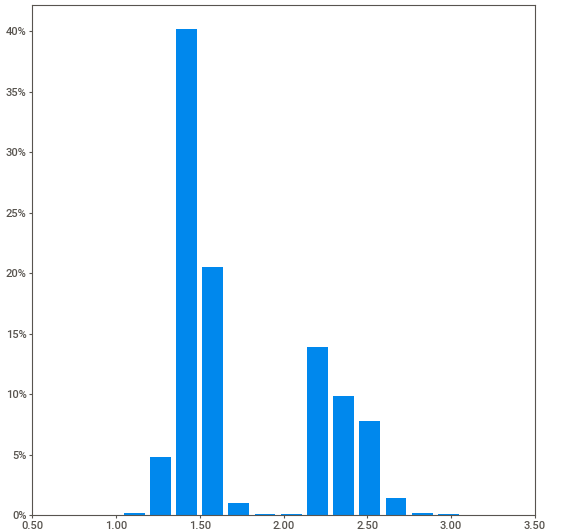
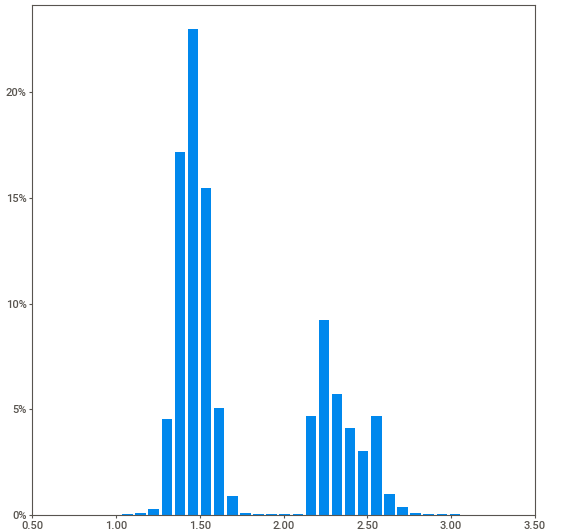
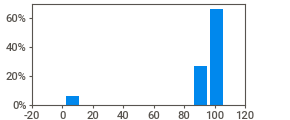
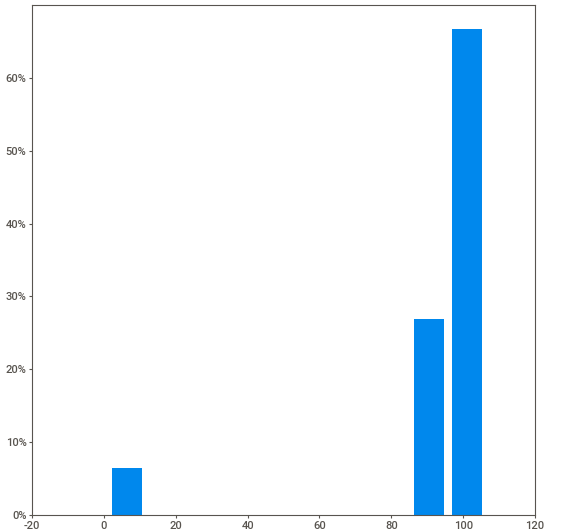
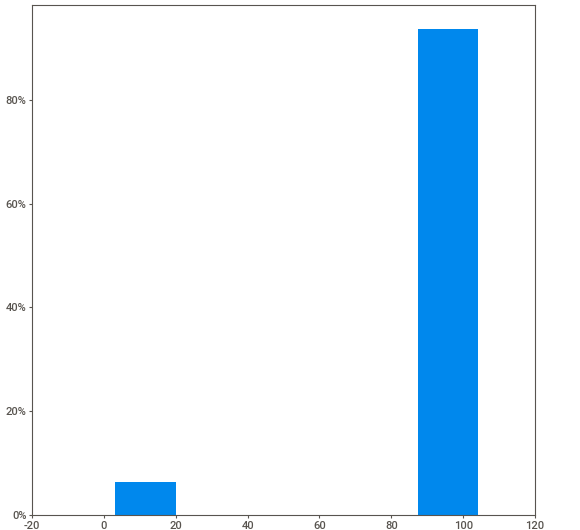
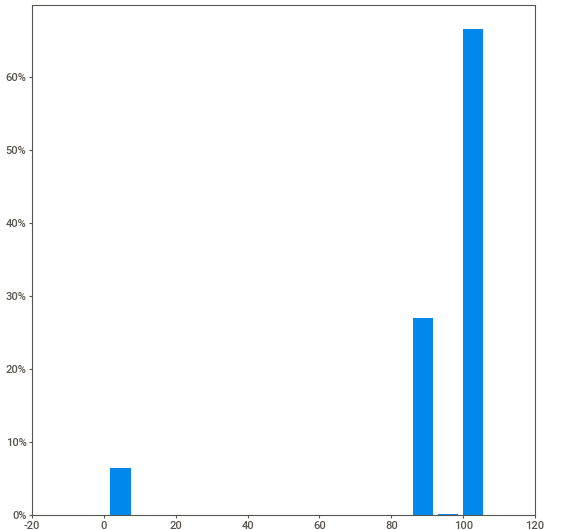
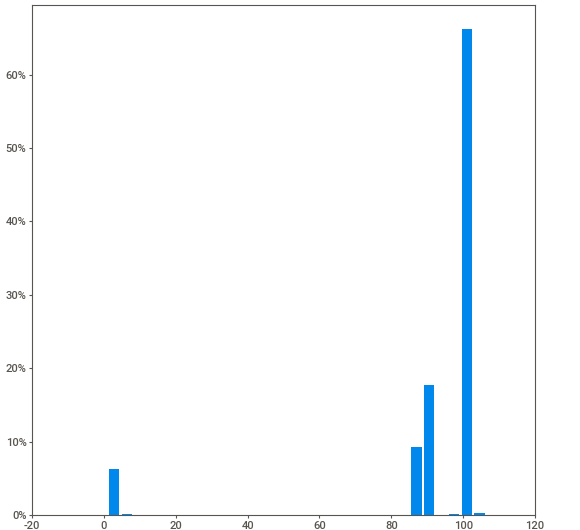
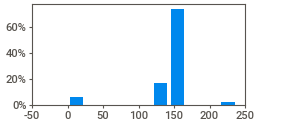
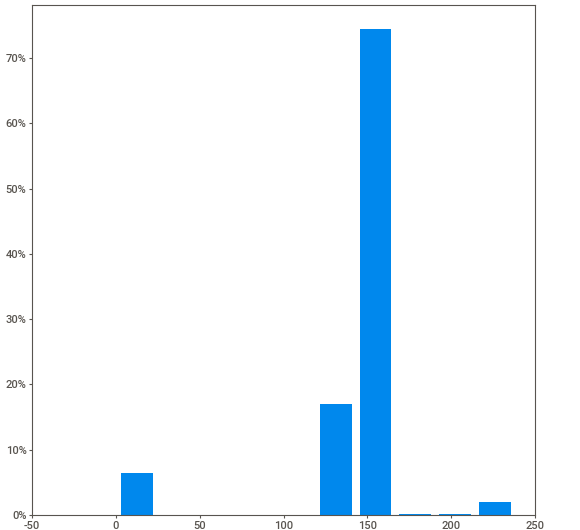
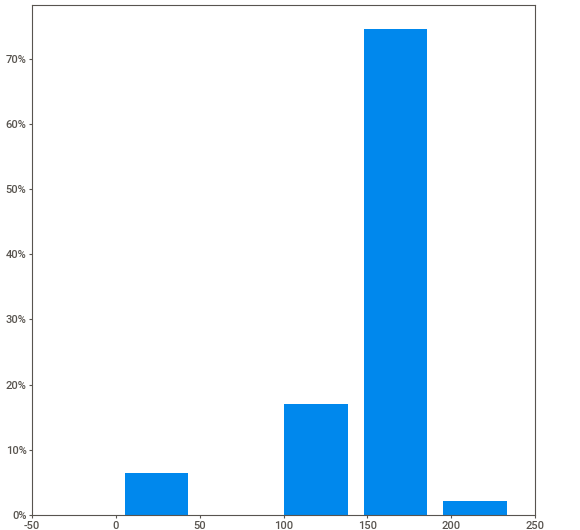
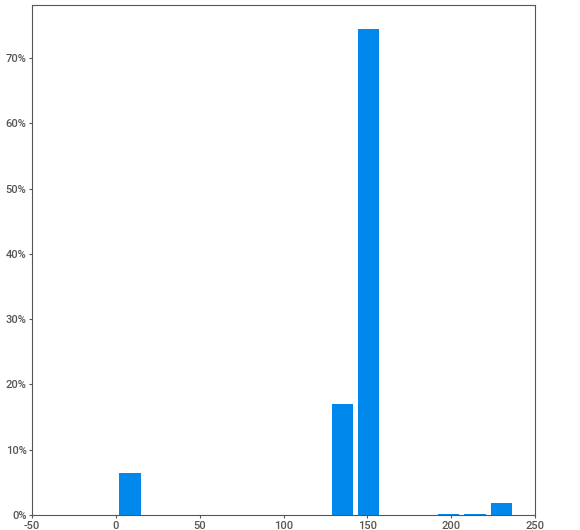
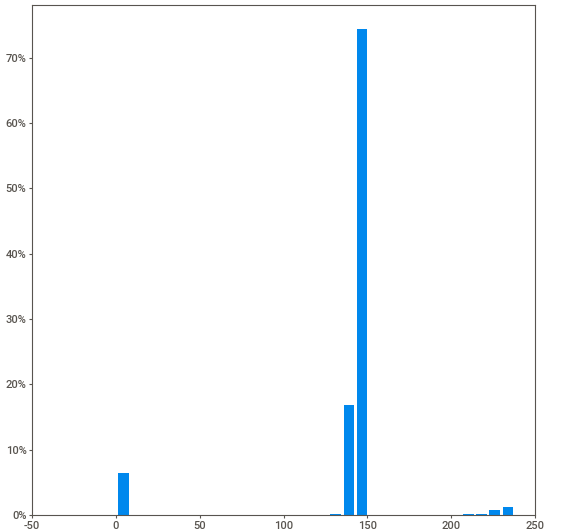
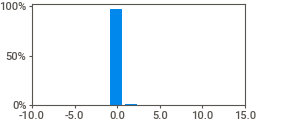
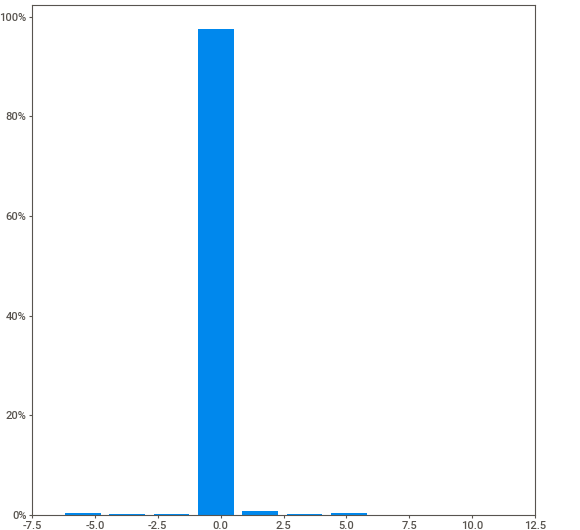
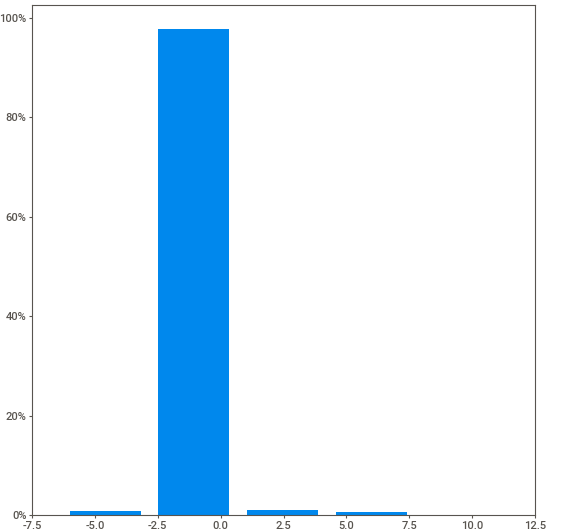
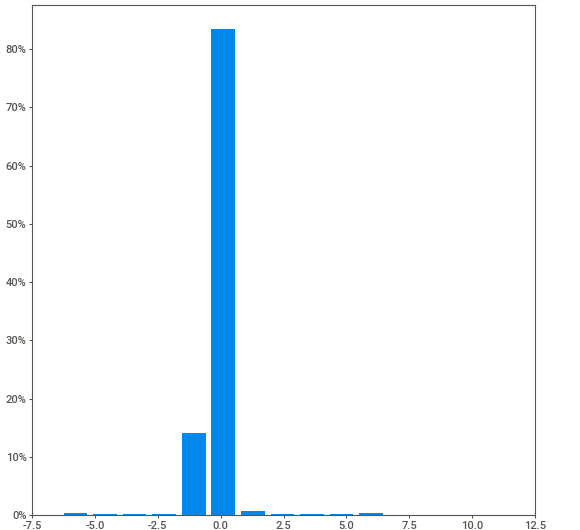
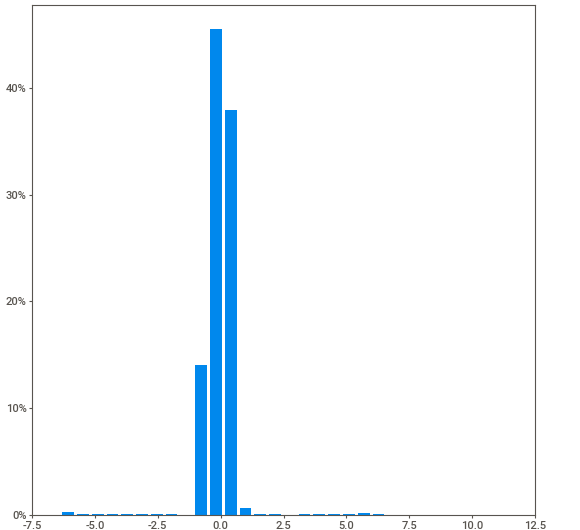
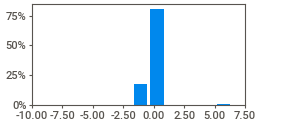
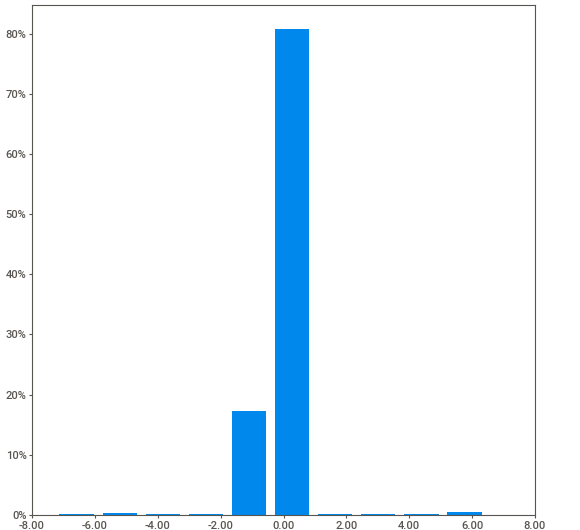
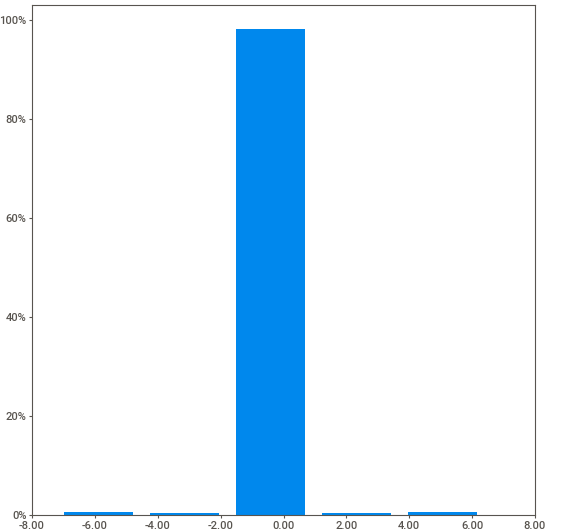
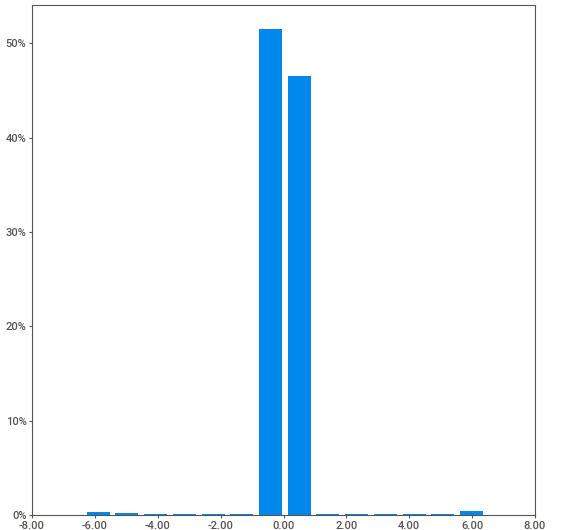
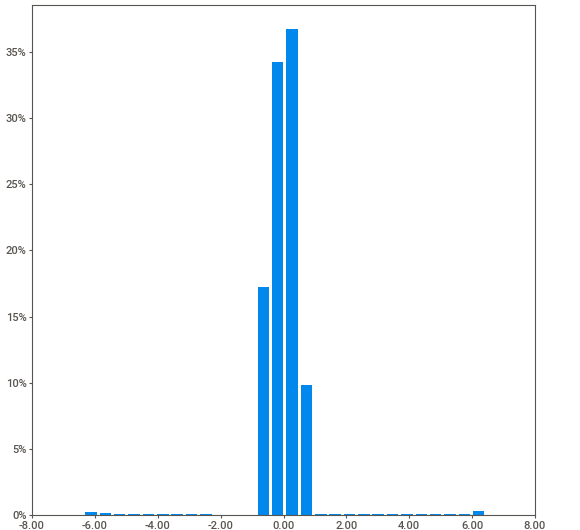
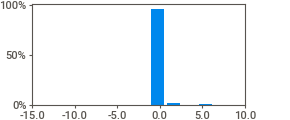
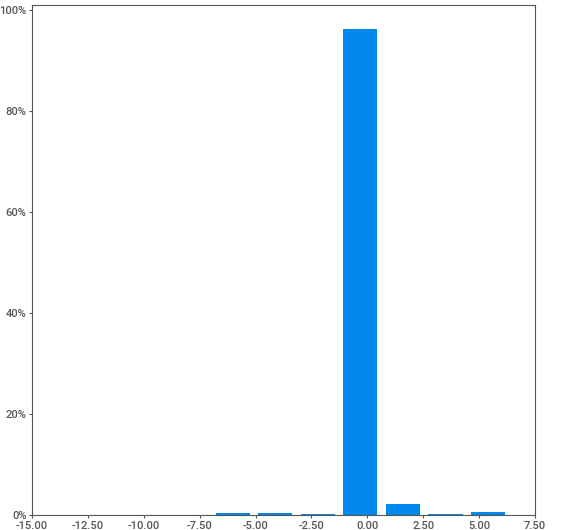
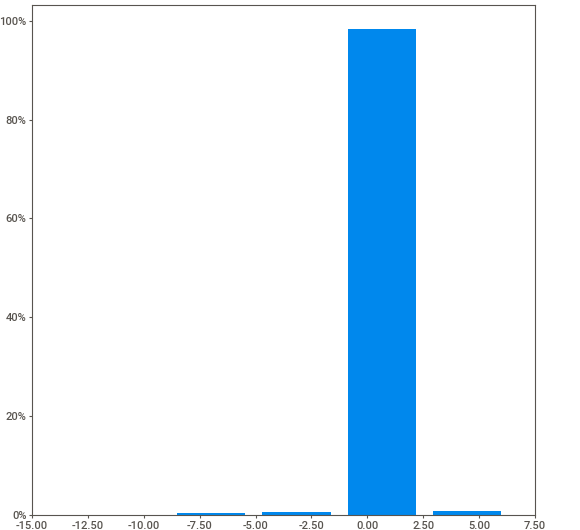
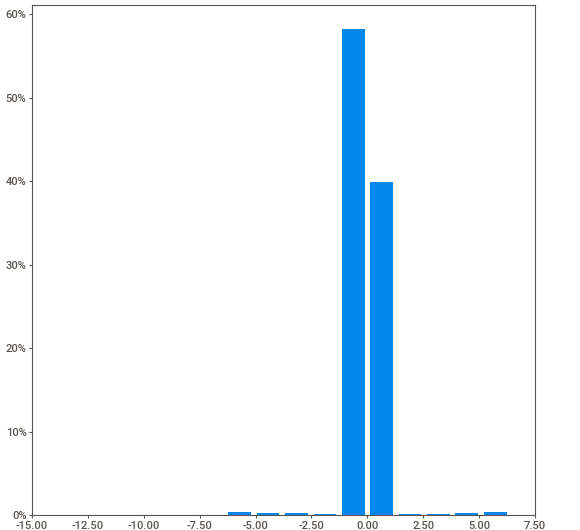
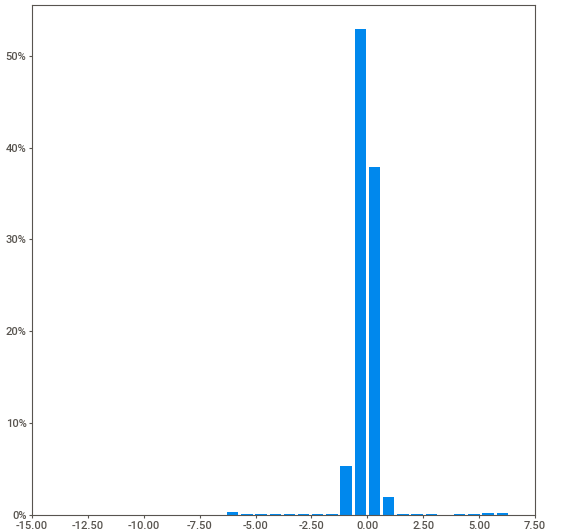
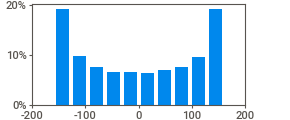
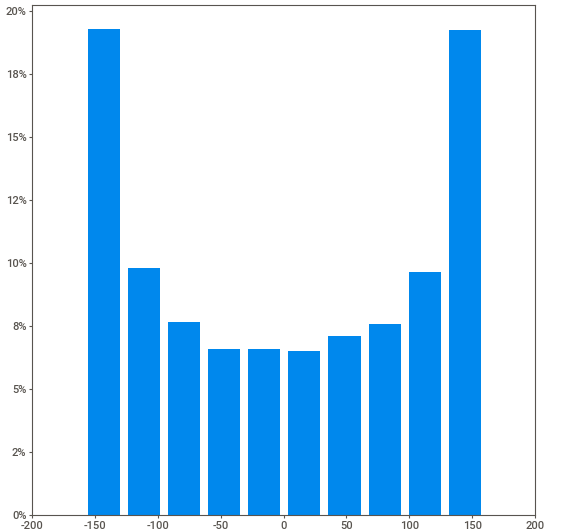
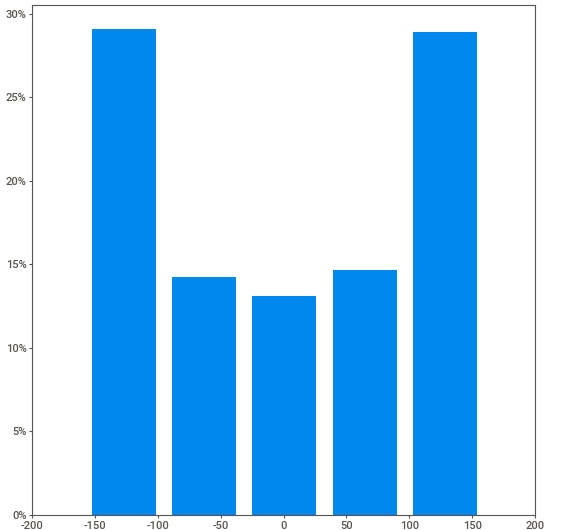
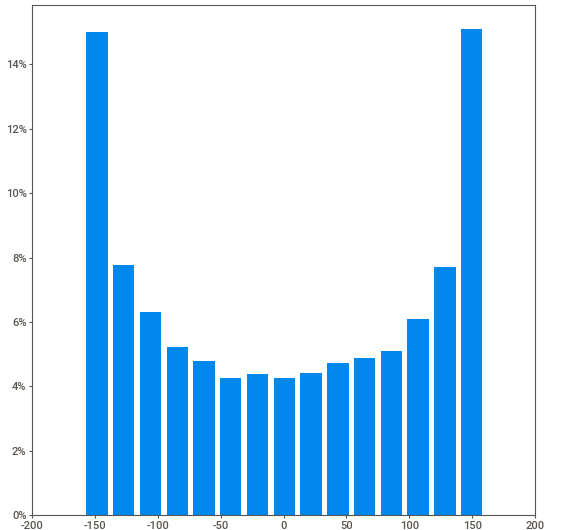
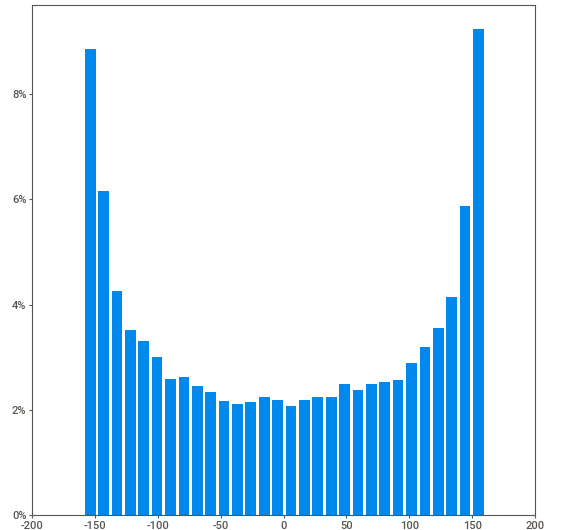
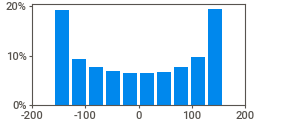
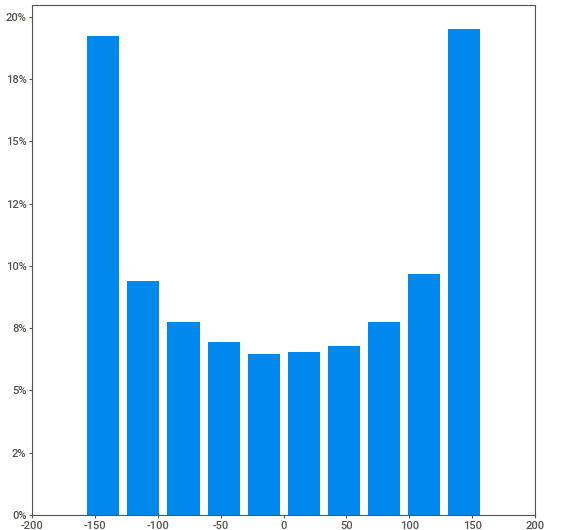
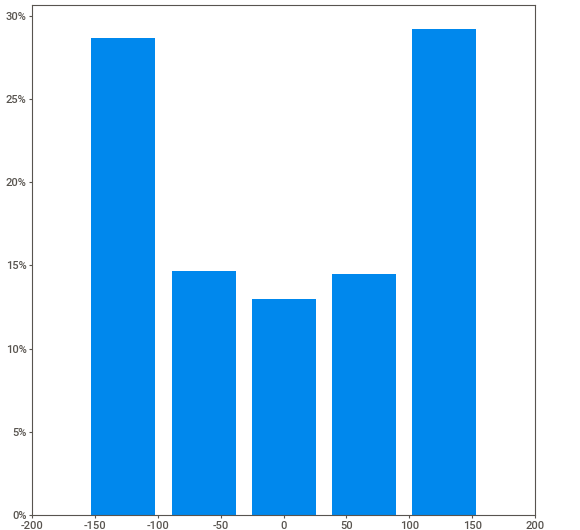
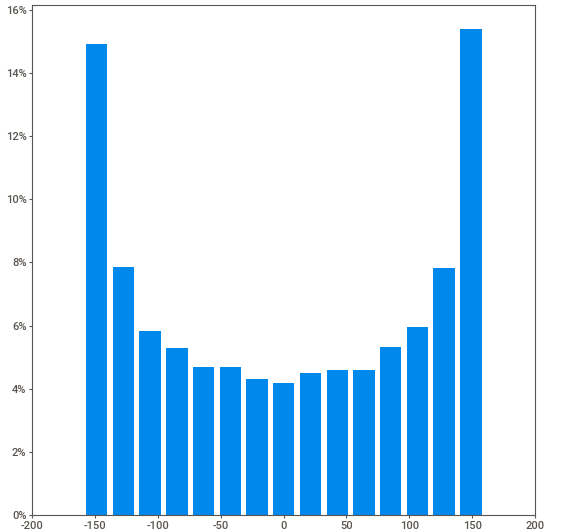
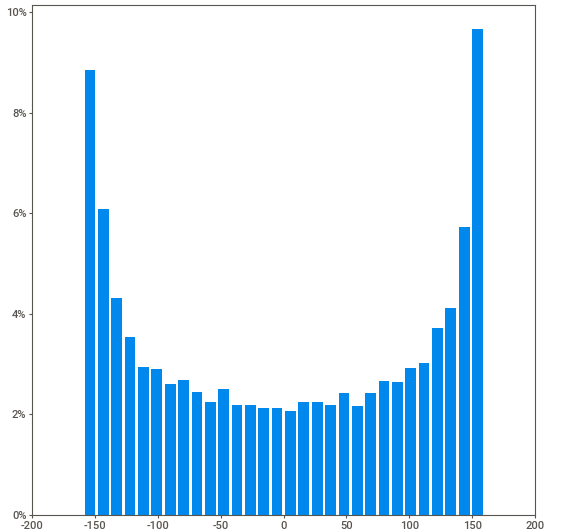
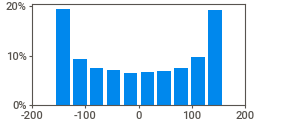
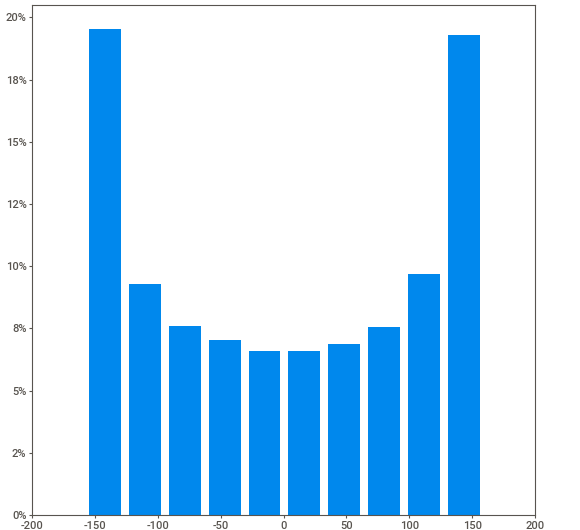
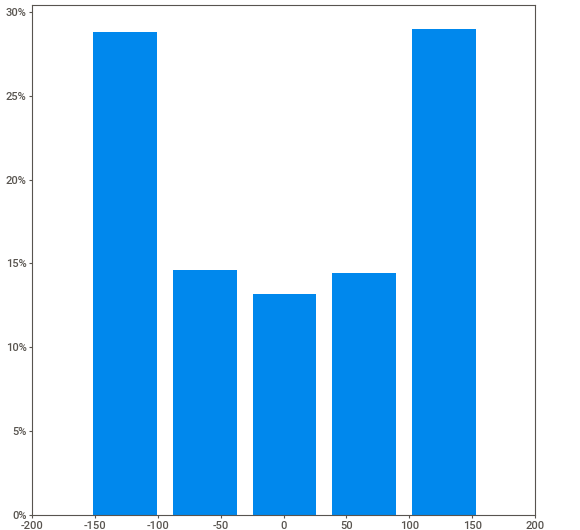
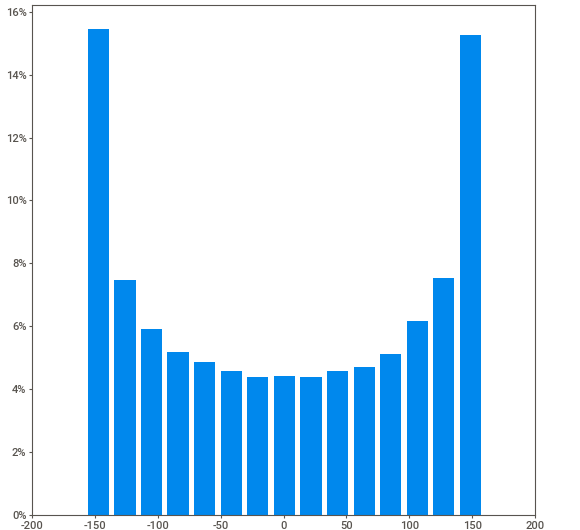
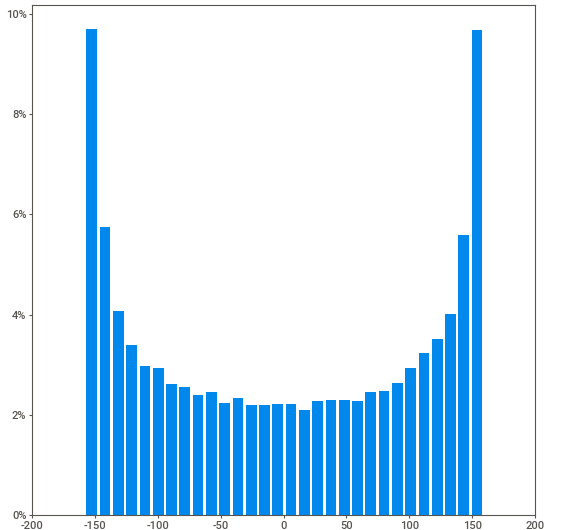
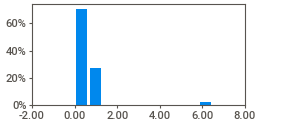
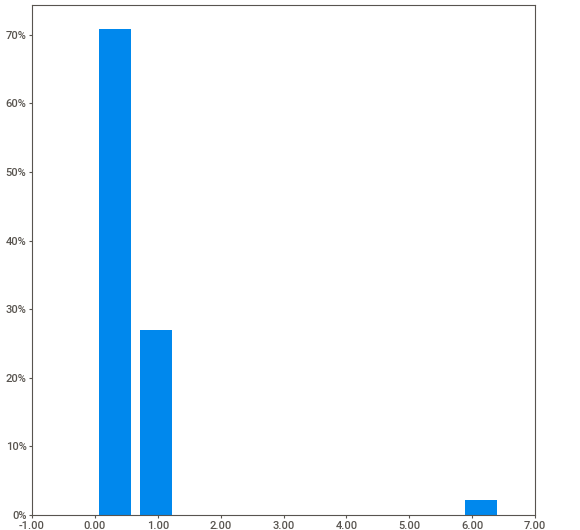
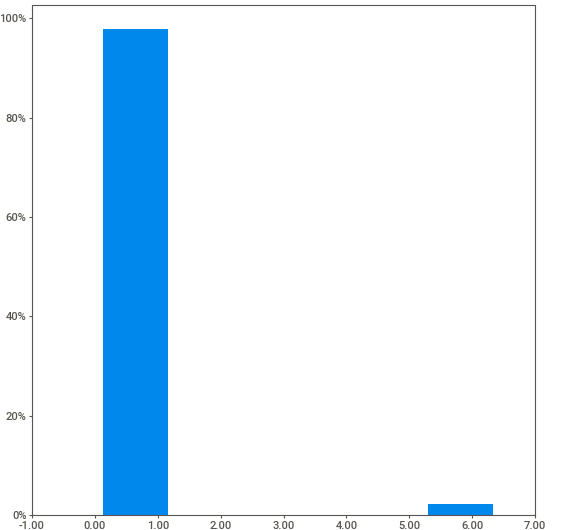
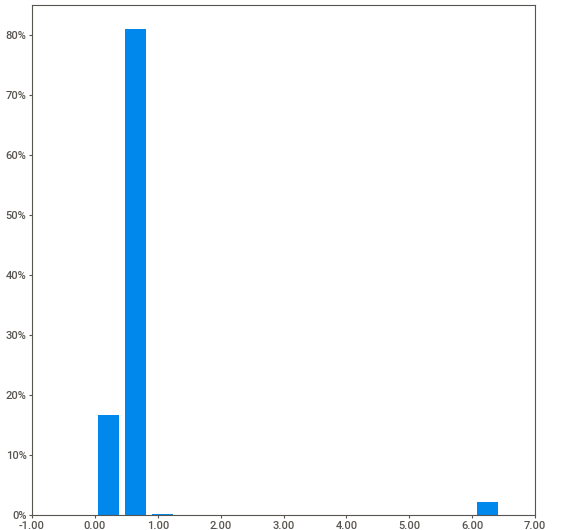
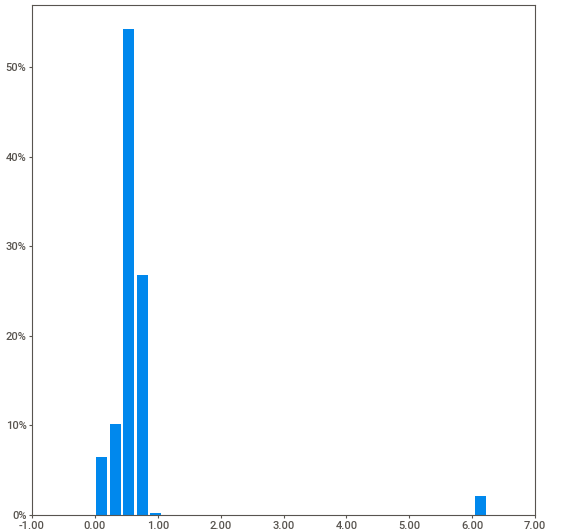
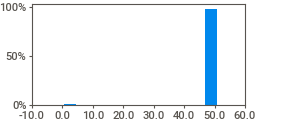
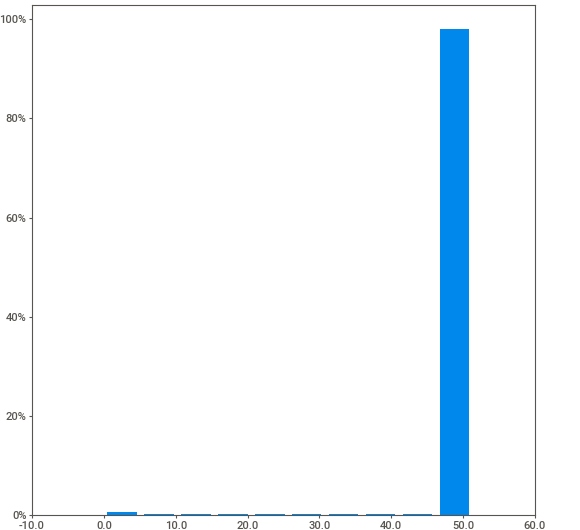
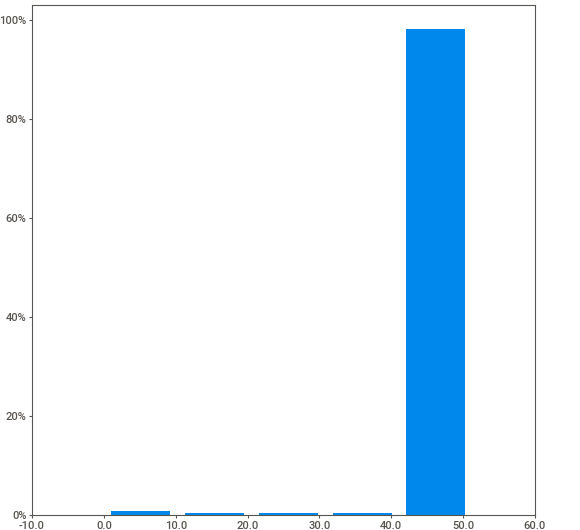
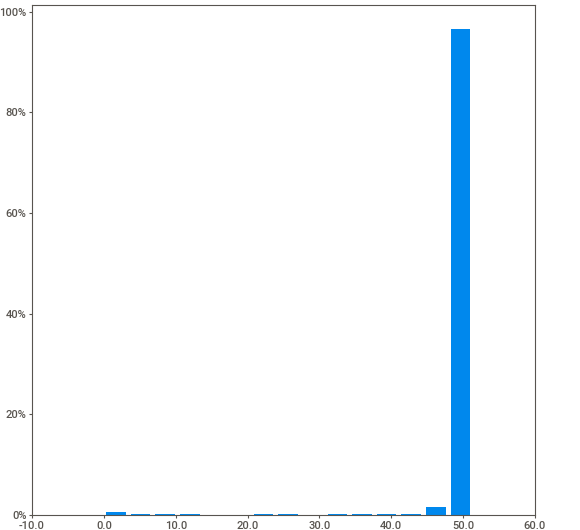
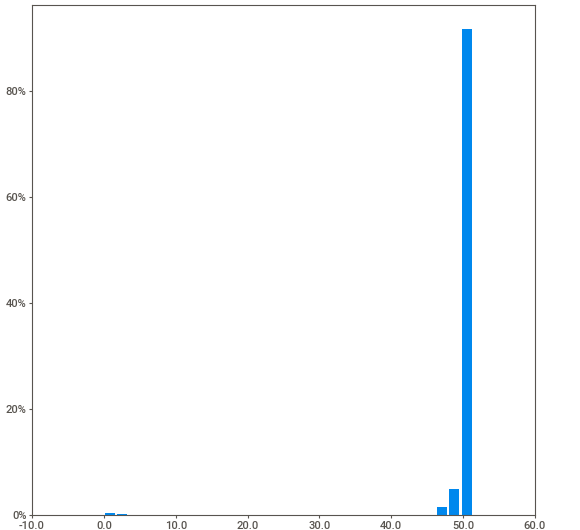
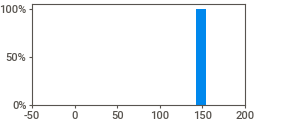
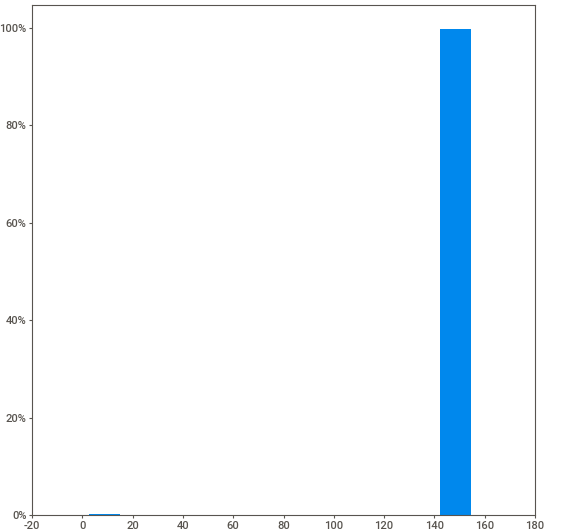
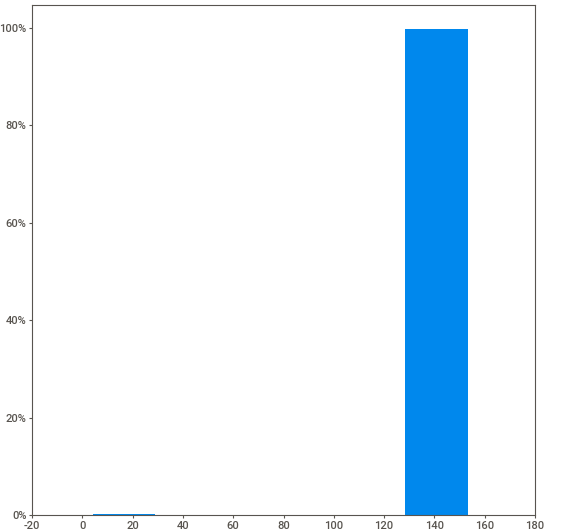
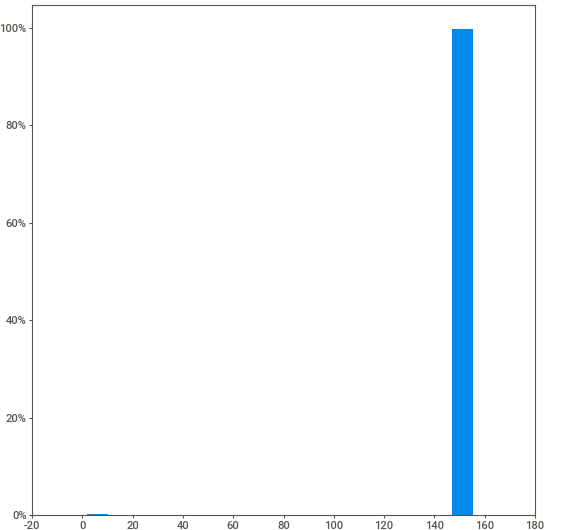
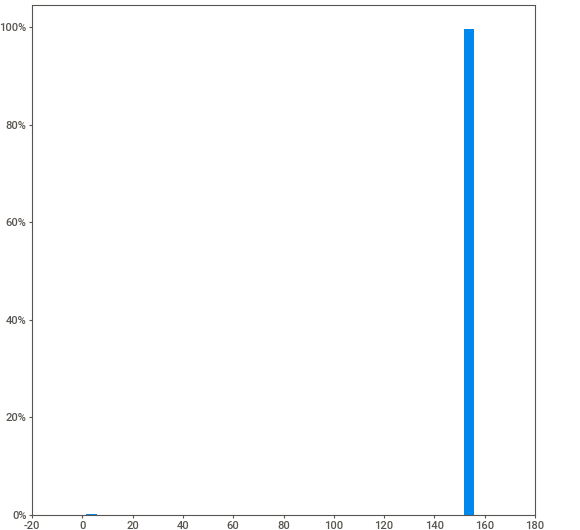
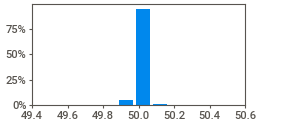
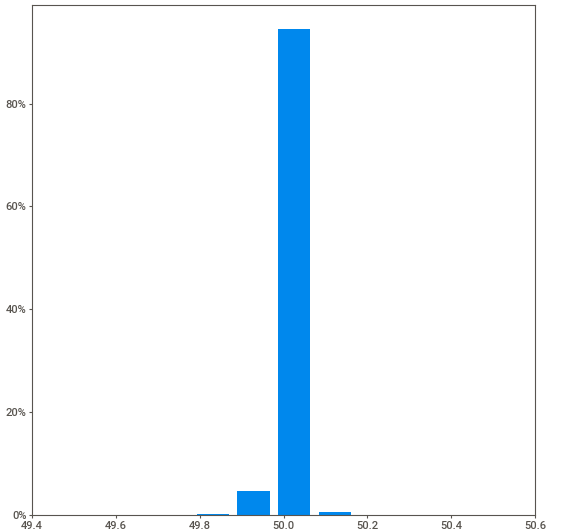
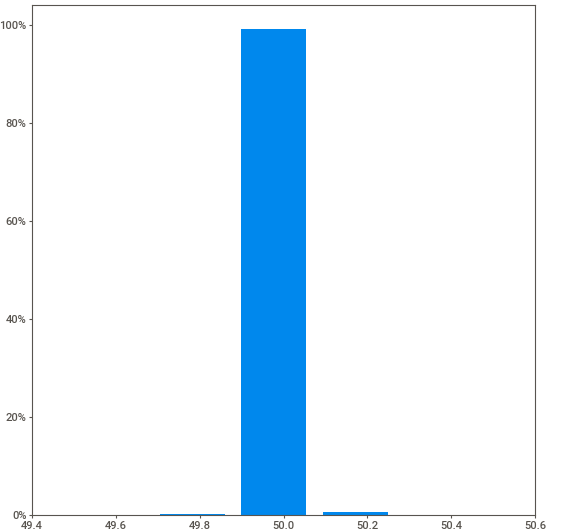
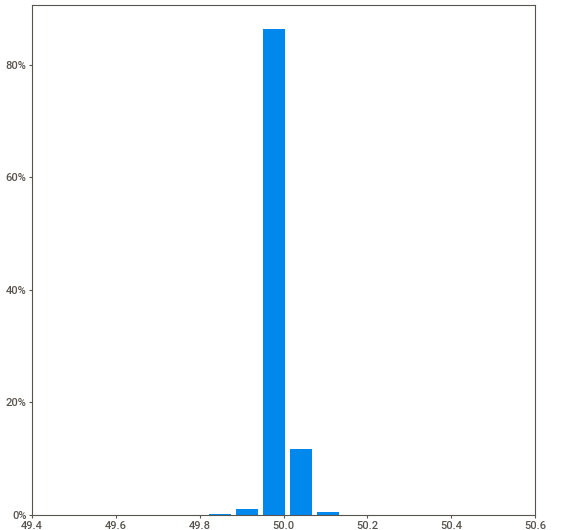
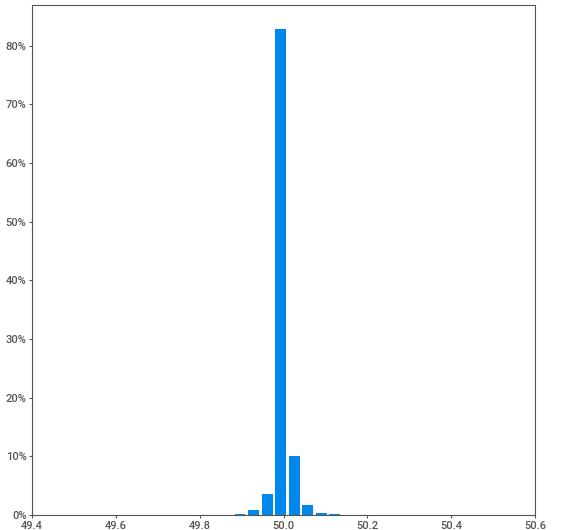
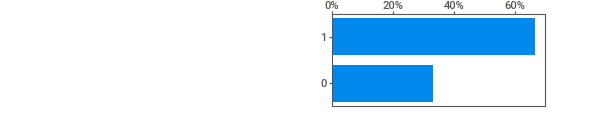
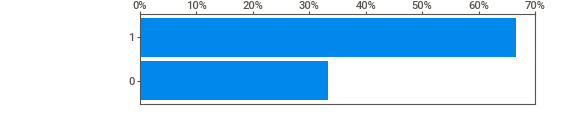
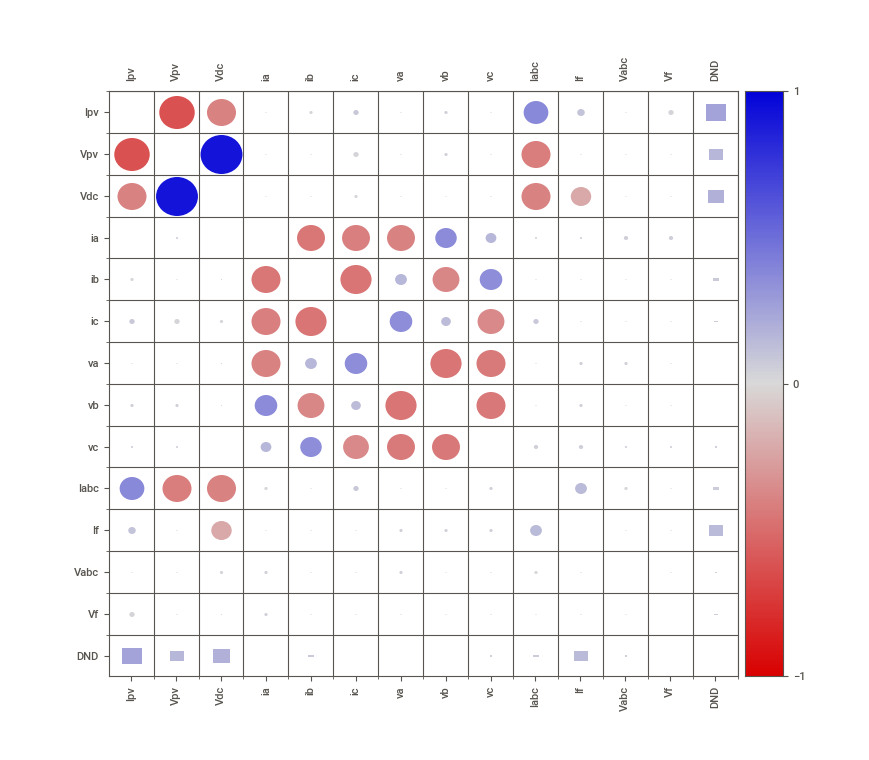
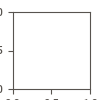

In [ ]:
import sweetviz as sv
s = sv.analyze(data)
s.show_notebook()

Imputation

Median imputation is a method for handling missing values in a dataset by replacing them with the median value of the complete observations in the same column. The median is the value that separates the higher half from the lower half of the data.

Median imputation is a simple and straightforward method that can be used when the missing values are missing at random (MAR) or missing completely at random (MCAR). It is particularly useful for handling missing values in continuous variables that are not normally distributed. This is because the median is robust to outliers and skewness, so it provides a good summary of the central tendency of the data even in the presence of missing values.

In [ ]:
# Data split into Input and Output
x = data.iloc[:, :13] # Predictors
print(x)

            Ipv         Vpv         Vdc        ia        ib        ic  \
0      1.544891  101.300049  142.968750  0.381835 -0.490112  0.094844   
1      2.320648   90.728760  146.777344  0.039428  0.584106 -0.670537   
2      1.536377  101.623535  142.968750  0.301269  0.134277 -0.381841   
3      2.373627   88.256836  147.363281  0.240844  0.429688 -0.636968   
4      2.286591   88.409424  147.656250  0.475829  0.187988 -0.663823   
...         ...         ...         ...       ...       ...       ...   
29995  2.273346   87.188721  147.070312  0.348266 -0.671387  0.316401   
29996  1.448395  101.373291  144.140625  0.435546 -0.476685  0.047847   
29997  2.317810   90.399170  147.070312 -0.464112  0.691528 -0.247563   
29998  1.495697  100.988770  144.140625 -0.517823  0.127563  0.363398   
29999  2.557159   87.957764  147.656250  0.247558  0.422974 -0.636968   

               va          vb          vc      Iabc         If        Vabc  \
0     -110.466919  150.391235  -39.679209  0.

In [ ]:
y = data.iloc[:, 13:] # Predictors
print(y)

       DND
0        0
1        0
2        1
3        1
4        1
...    ...
29995    1
29996    1
29997    0
29998    0
29999    1

[30000 rows x 1 columns]


In [ ]:
data['DND'] = data['DND'].replace({0: 'fault', 1: 'not faulty'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ipv     30000 non-null  float64
 1   Vpv     30000 non-null  float64
 2   Vdc     30000 non-null  float64
 3   ia      30000 non-null  float64
 4   ib      30000 non-null  float64
 5   ic      30000 non-null  float64
 6   va      30000 non-null  float64
 7   vb      30000 non-null  float64
 8   vc      30000 non-null  float64
 9   Iabc    30000 non-null  float64
 10  If      30000 non-null  float64
 11  Vabc    30000 non-null  float64
 12  Vf      30000 non-null  float64
 13  DND     30000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [ ]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If',
       'Vabc', 'Vf'],
      dtype='object')

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['DND'], dtype='object')

In [ ]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'median'))])
preprocessor = ColumnTransformer(transformers = [('impute', num_pipeline, numeric_features)])
impute = preprocessor.fit(x)

In [ ]:
joblib.dump(impute, 'Median_Imputation')


['Median_Imputation']

In [ ]:
imputation_data = pd.DataFrame(impute.transform(x), columns = numeric_features)
imputation_data

Ipv         Vpv         Vdc        ia        ib        ic  \
0      1.544891  101.300049  142.968750  0.381835 -0.490112  0.094844   
1      2.320648   90.728760  146.777344  0.039428  0.584106 -0.670537   
2      1.536377  101.623535  142.968750  0.301269  0.134277 -0.381841   
3      2.373627   88.256836  147.363281  0.240844  0.429688 -0.636968   
4      2.286591   88.409424  147.656250  0.475829  0.187988 -0.663823   
...         ...         ...         ...       ...       ...       ...   
29995  2.273346   87.188721  147.070312  0.348266 -0.671387  0.316401   
29996  1.448395  101.373291  144.140625  0.435546 -0.476685  0.047847   
29997  2.317810   90.399170  147.070312 -0.464112  0.691528 -0.247563   
29998  1.495697  100.988770  144.140625 -0.517823  0.127563  0.363398   
29999  2.557159   87.957764  147.656250  0.247558  0.422974 -0.636968   

               va          vb          vc      Iabc         If        Vabc  \
0     -110.466919  150.391235  -39.679209  0.465142  50.185838  154.751450   
1       -5.605316 -130.718384  136.930440  0.669008  49.907602  154.872942   
2     -113.673401  -30.859375  147.361552  0.447712  49.934645  154.892021   
3      -69.505920  -84.935608  154.325002  0.690778  50.330598  154.803659   
4     -106.067047  -46.361389  150.969849  0.699244  49.948302  155.071592   
...           ...         ...         ...       ...        ...         ...   
29995  -74.110718  153.971405  -81.544291  0.663070  50.216318  154.996440   
29996 -110.768280  149.909058  -40.374349  0.509297  50.163328  155.168063   
29997  109.466400 -150.535889   41.877136  0.691658  49.856226  154.988095   
29998  148.088837  -34.873505 -113.597056  0.501731  50.058510  154.936311   
29999  -57.318878  -93.783569  154.120076  0.671411  49.954470  155.226651   

              Vf  
0      49.995163  
1      50.001987  
2      50.008262  
3      49.993744  
4      50.004186  
...          ...  
29995  50.011969  
29996  50.008520  
29997  50.008975  
29998  49.999278  
29999  49.977158  

[30000 rows x 13 columns]

Outlier Analysis

Outlier treatment refers to the process of identifying and handling outliers in a dataset. Outliers are observations that are significantly different from the other observations in the dataset and can have a large impact on the results of statistical analysis and machine learning algorithms.

Winsorization: This method replaces outliers with a specified value, such as the maximum or minimum value within a certain range.

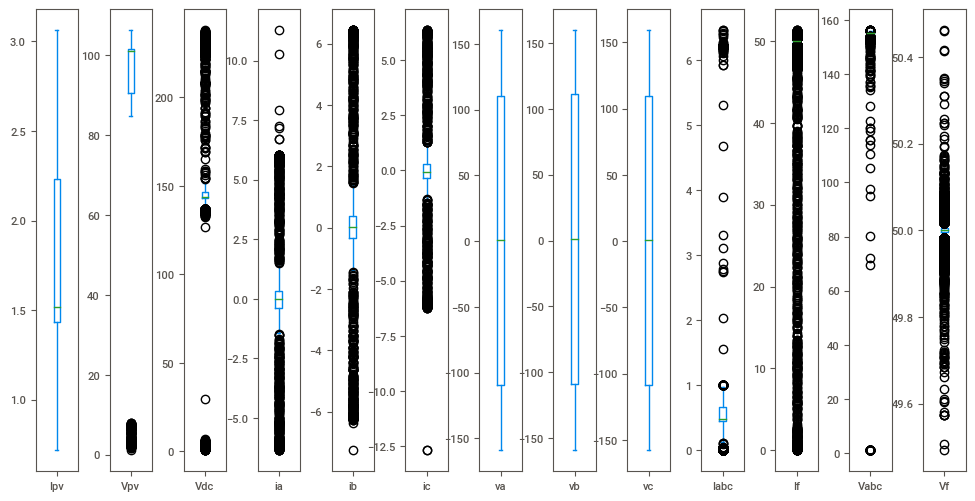

In [ ]:
# Multiple boxplots in a single visualization.
imputation_data.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 6))

# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [ ]:
winsor = Winsorizer(capping_method = 'iqr', # choosing  IQR rule boundaries
                          tail = 'both', # cap left, right or both tails
                          fold = 1.5,
                          variables = ['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf'])

clean_outlier = winsor.fit(imputation_data[['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic',
                                          'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf']])

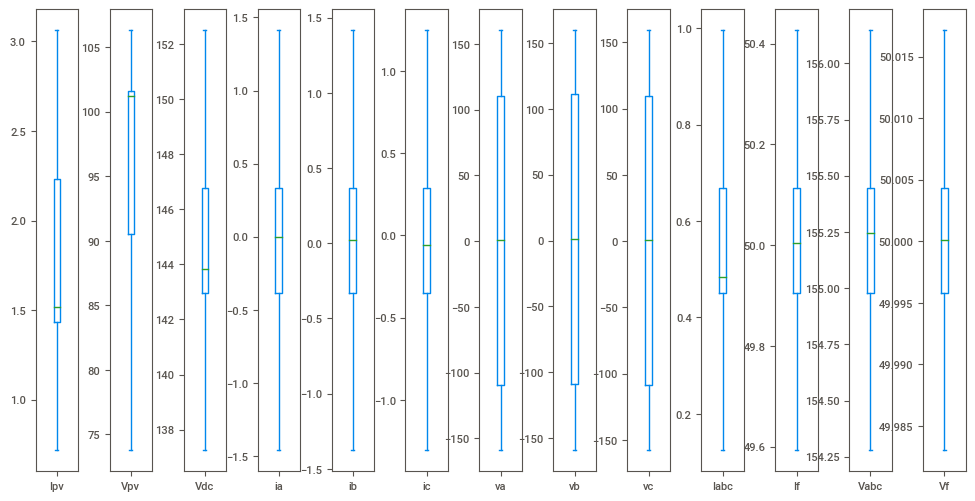

In [ ]:
imputation_data[['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc',
               'Vf']] = clean_outlier.transform(imputation_data[['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic',
                                                                 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf']])

imputation_data.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 6))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [ ]:
# Create the pipeline
pipeline = Pipeline([('clean_outlier', Winsorizer(capping_method ='iqr', variables=['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic',
                                                                                    'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc',
                                                                                    'Vf']))])

# Fit the pipeline to the data
pipeline.fit(imputation_data)

# Save the winsorizer model
joblib.dump(clean_outlier, 'Outlier_Winsorizer')

['Outlier_Winsorizer']

Scaling - RobustScaler

Robust scaling is a preprocessing method used in machine learning and data analysis to scale the features of a dataset in a way that is resistant to the presence of outliers. Unlike standard scaling methods, such as mean normalization or standard normalization, robust scaling methods are not sensitive to outliers and do not change the distribution of the data.

In [ ]:
scale_pipeline = Pipeline([('scale', RobustScaler())])
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)])
scale = scale_columntransfer.fit(imputation_data)

# Save the RobustScalar Model
joblib.dump(scale, 'RobustScalar')

['RobustScalar']

In [ ]:
scaled_data = pd.DataFrame(scale.transform(imputation_data))
print(scaled_data.shape)

(30000, 13)


In [ ]:
scaled_data


0         1         2         3         4         5         6   \
0      0.034279  0.008762 -0.230769  0.532710 -0.730769  0.242105 -0.507722   
1      1.003546 -0.939759  0.769231  0.056075  0.807692 -0.957895 -0.030476   
2      0.023641  0.037788 -0.230769  0.420561  0.163462 -0.505263 -0.522315   
3      1.069740 -1.161555  0.923077  0.336449  0.586538 -0.905263 -0.321300   
4      0.960993 -1.147864  1.000000  0.663551  0.240385 -0.947368 -0.487697   
...         ...       ...       ...       ...       ...       ...       ...   
29995  0.944444 -1.257393  0.846154  0.485981 -0.990385  0.589474 -0.342258   
29996 -0.086288  0.015334  0.076923  0.607477 -0.711538  0.168421 -0.509093   
29997  1.000000 -0.969332  0.846154 -0.644860  0.961538 -0.294737  0.493238   
29998 -0.027187 -0.019168  0.076923 -0.719626  0.153846  0.663158  0.669017   
29999  1.299054 -1.188390  1.000000  0.345794  0.576923 -0.905263 -0.265835   

             7         8         9         10        11        12  
0      0.676338 -0.184952 -0.089533  0.866837 -1.061033 -0.577345  
1     -0.600246  0.625133  0.846235 -0.467607 -0.800885  0.222613  
2     -0.146763  0.672979 -0.169539 -0.337906 -0.760034  0.958260  
3     -0.392336  0.704920  0.946164  1.561118 -0.949239 -0.743653  
4     -0.217162  0.689530  0.985022 -0.272409 -0.375523  0.480411  
...         ...       ...       ...       ...       ...       ...  
29995  0.692596 -0.376982  0.818979  1.013024 -0.536443  1.392709  
29996  0.674148 -0.188141  0.113141  0.758877 -0.168953  0.988465  
29997 -0.690242  0.189136  0.950201 -0.714010 -0.554314  1.041748  
29998 -0.164992 -0.524004  0.078415  0.256159 -0.665196 -0.094981  
29999 -0.432517  0.703980  0.857263 -0.242824 -0.043501 -2.000484  

[30000 rows x 13 columns]

Model Building with Supervised Learning Techniques

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import sklearn.metrics as skmet
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [ ]:
# Checking unique categories/ classes in the Output
data['DND'].unique()
data['DND'].value_counts()

DND
not faulty    20000
fault         10000
Name: count, dtype: int64

In [ ]:
# Defining Input and Output Variable
X = data.drop('DND', axis=1)
Y = data['DND']

In [ ]:
# Splitting data into Training & Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape


(24000, 13)

In [ ]:
X_test.shape

(6000, 13)

Decision Tree

A decision tree is a tree-based model used for supervised learning in classification and regression problems. It works by dividing the feature space into smaller regions, called leaf nodes, based on the values of the input features. The goal of the decision tree is to predict the target variable based on the values of the input features by making a series of decisions that are represented by the branches of the tree.

Each internal node of the tree represents a test on one of the features, and the branches represent the outcome of the test. The leaves represent the final prediction of the target variable based on the values of the input features.

The decision tree model is simple to understand and interpret, and it can handle both numerical and categorical features. However, decision trees are prone to overfitting, especially when the trees become very deep and complex.

In [ ]:
# Train the decision tree classifier
DT = DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 10)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
# Evaluate on Train Data

#Predict on the Train Data
DT_pred_Train = DT.predict(X_train)

# Accuracy on Train Data
DT_Train_Accuracy = accuracy_score(y_train, DT_pred_Train)
print("DT_Train_Accuracy:", DT_Train_Accuracy)

DT_Train_Accuracy: 0.9716666666666667


In [ ]:
#Confusion Matrix on Train Data using Decision Tree
pd.crosstab(np.ravel(y_train), DT_pred_Train.ravel(), rownames = ['Actual'], colnames= ['Predictions'])

Predictions     0      1
Actual                  
0            7713    335
1             345  15607

In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, DT_pred_Train))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8048
           1       0.98      0.98      0.98     15952

    accuracy                           0.97     24000
   macro avg       0.97      0.97      0.97     24000
weighted avg       0.97      0.97      0.97     24000



In [ ]:
# Evalute on Test data

# Predict on the test set
DT_pred_Test = DT.predict(X_test)

# Accuracy on Test Data
Test_DT_Accuracy = accuracy_score(y_test, DT_pred_Test)
print("DT_Test_Accuracy:", Test_DT_Accuracy)

DT_Test_Accuracy: 0.965


In [ ]:
#Confusion Matrix on Test Data using Decision Tree
pd.crosstab(np.ravel(y_test), DT_pred_Test.ravel(), rownames = ['Actual'], colnames= ['Predictions'])

Predictions     0     1
Actual                 
0            1857    95
1             115  3933

In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_test, DT_pred_Test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1952
           1       0.98      0.97      0.97      4048

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.97      0.96      0.97      6000



Hyperparameter Optimization - GridSearchCV

The GridSearchCV class in the scikit-learn library is a meta-estimator that performs a search for the best hyperparameters of a given model using cross-validation. It works by defining a grid of hyperparameters, and then training and evaluating the model for each combination of hyperparameters in the grid. The best hyperparameters are then selected based on the performance of the model.

When using GridSearchCV with a decision tree model, the hyperparameters that can be optimized include parameters such as the maximum depth of the tree, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node, and the criterion used to measure the quality of a split.

In [ ]:
### Decision Tree with GridSearchCV
# Decision tree model
dtree_model = DecisionTreeClassifier()

# Define Hyperparameters grid for GridSearchCV
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 21)}

# Initialise GridSearchCV
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)

# Fit GridSearchCV to the Data
dt_gsc = dtree_gscv.fit(X, y)

# Print the best parameters
print("Best parameters: ", dt_gsc.best_params_)
print('Best score: ', dt_gsc.best_score_)
dt_accuracy = dt_gsc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(dt_accuracy) )

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 17}
Best score:  0.9747666666666668
Accuracy for our training dataset with tuning is : 97.48%


In [ ]:
# Train the decision tree classifier
DT = DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'gini' , max_depth = 12)
DT.fit(X_train, y_train)

# Evaluate on Train Data
#Predict on the Train Data
DT_pred_Train = DT.predict(X_train)

# Accuracy on Train Data
DT_Train_Accuracy = accuracy_score(y_train, DT_pred_Train)
print("DT_Train_Accuracy:", DT_Train_Accuracy)

# Evalute on Test data
# Predict on the test set
DT_pred_Test = DT.predict(X_test)

# Accuracy on Test Data
Test_DT_Accuracy = accuracy_score(y_test, DT_pred_Test)
print("DT_Test_Accuracy:", Test_DT_Accuracy)

DT_Train_Accuracy: 0.988375
DT_Test_Accuracy: 0.9696666666666667


In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, DT_pred_Train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8048
           1       0.99      0.99      0.99     15952

    accuracy                           0.99     24000
   macro avg       0.99      0.99      0.99     24000
weighted avg       0.99      0.99      0.99     24000



In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_test, DT_pred_Test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1952
           1       0.98      0.97      0.98      4048

    accuracy                           0.97      6000
   macro avg       0.96      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



Random Forest Classifier

Random Forest is a popular ensemble machine learning algorithm that can be used for both classification and regression tasks. The main idea behind the Random Forest algorithm is to combine multiple decision trees to form a "forest" of trees. The decision trees are constructed using a random subset of the data and a random subset of the features at each split, which makes the model more robust to overfitting and noise in the data.

The prediction made by a Random Forest model is the average or majority vote of the predictions made by individual decision trees. This averaging or voting mechanism reduces the variance and enhances the performance of the model.

To use the Random Forest algorithm in scikit-learn, you can use the RandomForestClassifier class. The main hyperparameters of the RandomForestClassifier class include:

n_estimators: The number of decision trees in the forest.

max_depth: The maximum depth of each decision tree.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

criterion: The criterion used to measure the quality of a split.

In [ ]:
# Train the decision tree classifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 15, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [ ]:
# Evaluate on Train Data

#Predict on the Train Data
rfc_pred_train = rfc.predict(X_train)

# Calculate the accuracy of the model on the training set
rfc_train_accuracy = accuracy_score(y_train, rfc_pred_train)

# Accuracy on Train Data
print("RandomForest_Train_Accuracy is" , rfc_train_accuracy)

RandomForest_Train_Accuracy is 0.9971666666666666


In [ ]:
#Confusion Matrix on Train Data using Random Forest Classifier
pd.crosstab(np.ravel(y_train), rfc_pred_train.ravel(), rownames = ['Actual'], colnames= ['Predictions'])

Predictions     0      1
Actual                  
0            8016     32
1              36  15916

In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, rfc_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8048
           1       1.00      1.00      1.00     15952

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



In [ ]:
# Evaluate on Test Data

#Predict on the Test Data
rfc_pred_test = rfc.predict(X_test)

# Calculate the accuracy of the model on the testing set
rfc_test_accuracy = accuracy_score(y_test, rfc_pred_test)

# Accuracy on test Data
print("Random_Forest_Test_Accuracy is" , rfc_test_accuracy)

Random_Forest_Test_Accuracy is 0.9858333333333333


In [ ]:
#Confusion Matrix on Test Data using Random Forest Classifier
pd.crosstab(np.ravel(y_test), rfc_pred_test.ravel(), rownames = ['Actual'], colnames= ['Predictions'])

Predictions     0     1
Actual                 
0            1905    47
1              38  4010

In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1952
           1       0.99      0.99      0.99      4048

    accuracy                           0.99      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.99      0.99      0.99      6000



Random Forest Classifier using GridSearchCV

GridSearchCV is a hyperparameter tuning method that is commonly used in machine learning. It is used to find the best hyperparameters for a given model, in this case, the Random Forest Classifier. The idea is to create a grid of hyperparameter values and then fit the model to the training data for each combination of hyperparameters. The hyperparameters that result in the best performance on a validation set are then chosen as the best hyperparameters.

In order to use GridSearchCV to tune the hyperparameters of a RandomForestClassifier, you would first create an instance of the RandomForestClassifier class, then pass this instance to the GridSearchCV class along with a specified hyperparameter grid to search over.

In [ ]:
# Random Forest model
rf_model = RandomForestClassifier()

# Define Hyperparameters grid for GridSearchCV
params_rf = param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': np.arange(3, 15)}

# Initialise GridSearchCV
rf_gscv = GridSearchCV(rf_model, params_rf, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)

# Fit GridSearchCV to the Data
rf_gsc = rf_gscv.fit(X, y)

# Print the best parameters
print("Best parameters: ", rf_gsc.best_params_)
print('Best score: ', rf_gsc.best_score_)
rf_accuracy = rf_gsc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(rf_accuracy) )

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'max_depth': 14, 'n_estimators': 300}
Best score:  0.9832333333333334
Accuracy for our training dataset with tuning is : 98.32%


Cross Validation on RandomForest

In [ ]:
# create the model
model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
# perform cross-validation
scores = cross_val_score(model, X, y, cv = 10)

In [ ]:
# calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_dev = np.std(scores)

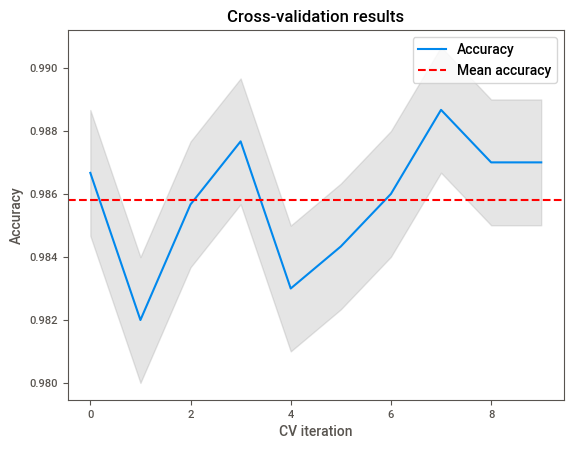

In [ ]:
# plot the cross-validation results
plt.plot(scores, label='Accuracy')
plt.fill_between(range(len(scores)), scores-std_dev, scores+std_dev, color = 'gray', alpha = 0.2)
plt.axhline(y = mean_score, color = 'red', linestyle = '--', label = 'Mean accuracy')
plt.xlabel('CV iteration')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.legend()
plt.show()

In [ ]:
# print the average accuracy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.00)


Logistic Regression

Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. It is used for binary classification problems, where the goal is to predict one of two possible outcomes, such as "yes" or "no". Logistic Regression models the relationship between the dependent variable and independent variables by using the logistic function (also known as the sigmoid function).

The logistic function outputs a probability value between 0 and 1, which can then be thresholded to make binary class predictions. The coefficients of the independent variables in a Logistic Regression model can be estimated using maximum likelihood estimation. The model can then be used to make predictions for new data, by inputting the values of the independent variables and using the estimated coefficients to calculate the predicted probability.

In [ ]:
# Create and fit a logistic regression model
# Create list of different solvers
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [ ]:
# loop through solvers and fit logistic regression model
for solver in solvers:
    logreg = LogisticRegression(solver=solver)
    logreg.fit(X_train, y_train)

# make predictions on train and test data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# calculate train and test accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.36      0.44      8048
           1       0.73      0.87      0.79     15952

    accuracy                           0.70     24000
   macro avg       0.66      0.61      0.62     24000
weighted avg       0.68      0.70      0.68     24000

              precision    recall  f1-score   support

           0       0.58      0.37      0.45      1952
           1       0.74      0.87      0.80      4048

    accuracy                           0.71      6000
   macro avg       0.66      0.62      0.63      6000
weighted avg       0.69      0.71      0.69      6000



In [ ]:
print(f"Solver: {solver}")
print(f"Train_Accuracy: {train_acc:.3f}")
print(f"Test_Accuracy: {test_acc:.3f}")
print("")

Solver: saga
Train_Accuracy: 0.699
Test_Accuracy: 0.707



Hyperparameter tuning using GridSearchCV

In [ ]:
# Define the set of solvers to be tested
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Define the parameter grid for GridSearchCV
param_grid = {'solver': solvers, 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create an instance of Logistic Regression
log_reg = LogisticRegression()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
reg_gsc = grid_search.fit(X, y)

# Get the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
reg_accuracy = reg_gsc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(reg_accuracy) )

Best parameters:  {'C': 1, 'solver': 'newton-cg'}
Best score:  0.7866
Accuracy for our training dataset with tuning is : 78.66%


K Nearest Neighbors Classifier

K-Nearest Neighbors (KNN) is a simple yet powerful machine learning algorithm used for classification as well as regression. It is a non-parametric, lazy learning algorithm that assigns the class label to a new sample point by considering the majority vote of its K nearest neighbors.

KNN is a distance-based algorithm that calculates the distance between the target sample and the neighboring samples. The number of nearest neighbors to be considered is represented by K. The algorithm assigns the class label to the target sample based on the majority vote of its K nearest neighbors. This algorithm is used in a wide range of applications, including computer vision, speech recognition, and even recommender systems.

In [ ]:
# Create a Knn Classifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
# Train the Knn Model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluate the Model with Train Data
# Predict on Train Data
knn_pred_train = knn.predict(X_train)
knn_pred_train

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Confusion Matrix on Train Data
pd.crosstab(np.ravel(y_train), knn_pred_train.ravel(), rownames = ['Actual'], colnames = ['Predictions'])

Predictions     0      1
Actual                  
0            6496   1552
1             666  15286

In [ ]:
# Accuracy Measure on Train Data
print(skmet.accuracy_score(y_train, knn_pred_train))

0.9075833333333333


In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, knn_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85      8048
           1       0.91      0.96      0.93     15952

    accuracy                           0.91     24000
   macro avg       0.91      0.88      0.89     24000
weighted avg       0.91      0.91      0.91     24000



In [ ]:
# Predict on Test Data
knn_pred_test = knn.predict(X_test)
knn_pred_test

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
# Confusion Matrix on Test Data
pd.crosstab(np.ravel(y_test), knn_pred_test.ravel(), rownames = ['Actual'], colnames = ['Predictions'])

Predictions     0     1
Actual                 
0            1401   551
1             369  3679

In [ ]:
# Accuracy Measure on Test Data
print(skmet.accuracy_score(y_test, knn_pred_test))

0.8466666666666667


In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1952
           1       0.87      0.91      0.89      4048

    accuracy                           0.85      6000
   macro avg       0.83      0.81      0.82      6000
weighted avg       0.84      0.85      0.84      6000



[Text(0.5, 1.0, 'Solar Panel Fault Detection - kNN- Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

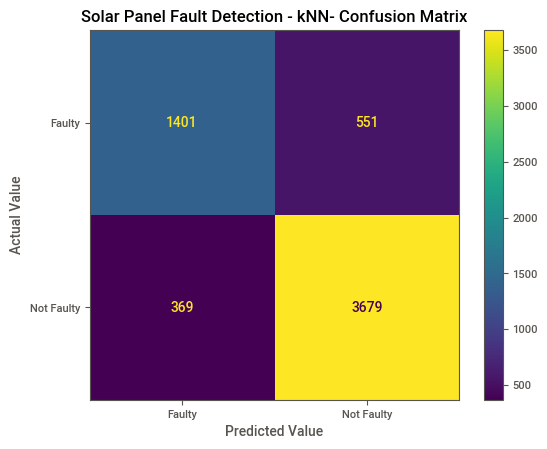

In [ ]:
cm = skmet.confusion_matrix(y_test, knn_pred_test)

cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Faulty', 'Not Faulty'])
cmplot.plot()
cmplot.ax_.set(title = 'Solar Panel Fault Detection - kNN- Confusion Matrix',
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [ ]:
# creating empty list variable
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and
# storing the accuracy values

for i in range(3, 50, 2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, y_train.values.ravel()) # Flatten y_train to 1D array
    train_acc = np.mean(neigh.predict(X_train) == y_train.values.ravel()) # Flatten y_train to 1D array
    test_acc = np.mean(neigh.predict(X_test) == y_test.values.ravel()) # Flatten y_test to 1D array
    diff = train_acc - test_acc
    acc.append([diff, train_acc, test_acc])
    acc

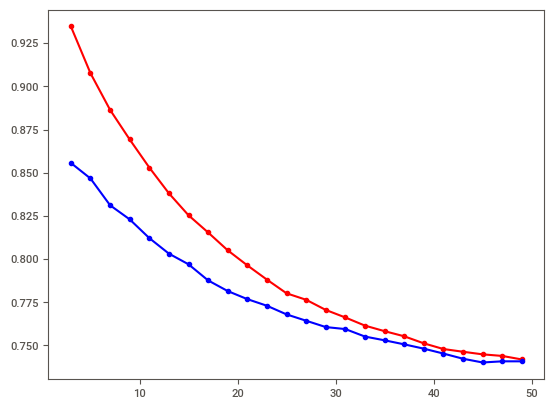

In [ ]:
# Plotting the data accuracies in a single plot
# Train Data Accuracy Plot
plt.plot(np.arange(3, 50, 2), [i[1] for i in acc], "ro-")
# Test Data Accuracy Plot
plt.plot(np.arange(3, 50, 2), [i[2] for i in acc], "bo-")

Hyperparameter Tuning

In [ ]:
### k-Nearest Neighbors (k-NN) with GridSearchCV
Knn = KNeighborsClassifier()

#Define Hyperparameters grid for grid search
params_Knn = {'n_neighbors': np.arange(3, 50)}

# Initialize GridSearchCV
Knn_gs = GridSearchCV(knn, params_Knn, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1 )

# Fit GridSearchCV to the Data
Knn_new = Knn_gs.fit(X_train, y_train)

#Get the best Hyperparameters
print("Best Parameters:", Knn_new.best_params_)
print('Best score: ', Knn_new.best_score_)
Knn_accuracy = Knn_new.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Knn_accuracy) )

Fitting 5 folds for each of 47 candidates, totalling 235 fits
Best Parameters: {'n_neighbors': 3}
Best score:  0.8377916666666666
Accuracy for our training dataset with tuning is : 83.78%


SVM

Support Vector Machines (SVM) is a popular machine learning algorithm used for classification and regression problems. It is a linear model that works well with high dimensional data, and is capable of solving complex problems with large amounts of data.

In SVM, the idea is to find the hyperplane that separates the classes with the maximum margin, which is defined as the distance between the hyperplane and the nearest samples from each class, called support vectors. The hyperplane that maximizes the margin is called the maximum margin hyperplane, and it provides the best separation between the classes.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the SVM model
svm_model = SVC(kernel ='linear', C = 1)
svm_model.fit(X_train, y_train)
svm_model.fit(X_test, y_test)

SVC(C=1, kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred_test = svm_model.predict(X_test)

# Make predictions on the train set
y_pred_train = svm_model.predict(X_train)

In [ ]:
# Evaluation Metrics on test set
acc = accuracy_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Accuracy:", acc)

Accuracy: 0.793


In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.50      0.61      1952
           1       0.79      0.94      0.86      4048

    accuracy                           0.79      6000
   macro avg       0.79      0.72      0.73      6000
weighted avg       0.79      0.79      0.78      6000



In [ ]:
# Evaluation Metrics on train set
acc = accuracy_score(y_train, y_pred_train)

# Print the evaluation metrics
print("Accuracy:", acc)

Accuracy: 0.7880416666666666


In [ ]:
# Precison, Recall, F1-Score, Support Params
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.49      0.61      8048
           1       0.78      0.94      0.85     15952

    accuracy                           0.79     24000
   macro avg       0.79      0.71      0.73     24000
weighted avg       0.79      0.79      0.77     24000



Save the Best Model with Pickel library

Pickle is a Python library for serializing and deserializing Python objects to and from binary data streams. It is used to store and retrieve the state of Python objects, including custom classes and functions, between different runs of a program or between different Python processes.

In [ ]:
# Save the model
pickle.dump(rfc, open('rfc.pkl', 'wb'))

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# Load the model
model = pickle.load(open('rfc.pkl', 'rb'))